# **Content**
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
Four files are available:

train-images-idx3-ubyte.gz: training set images
(9912422 bytes)

---

train-labels-idx1-ubyte.gz: training set labels (28881 bytes)


---

t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)


---


t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

---
each image is 28x28
labels 0-9

Each pixel is a grayscale value (0–255)
So, one image looks like this in memory:

[  0   0   0  34 180 255 120 ...  0   0 ]


That’s 784 numbers (28×28), usually stored in a 1D flattened array.

In [ ]:

import torch
#to download MNIST
from torchvision import datasets
#numpy for fast calculations and arrays
import numpy as np
import pandas as pd
#for data splitting
from sklearn.model_selection import train_test_split
#pairs images with lables
#DataLoader: load data in batches during training
from torch.utils.data import Dataset,DataLoader,TensorDataset




*1. Data Prepartation*

# **A1-DATA PREPROCESSING**

In [ ]:
#Download MNIST DATASET
mnist_train = datasets.MNIST(root='./data',train=True,download=True)
mnist_test = datasets.MNIST(root='./data',train=False,download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 120MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 21.5MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 78.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.99MB/s]


**This downloads the data automatically by pytorch datasets and store them into a folder named data (root='./data') within the content folder**


---
- root: determines where the data should be stored
- train = true
means: load the training set (60,000 images)

- train = False means load the test set which is =10,000 image

- download = true means of the data folder (root) isnt available download it automatically if it already exist skip downloading
- if download = false if the the folder data doesnt exist it will throw an error



*what* does pytorch do internally
1. reads the .ubyte files (binary format)
2. store the data as pytorch tensors (tensors are just like the numpy arrays but faster)

In [ ]:
print(f"mnsit_train: {type(mnist_train)}")
print(mnist_train.targets) #Label
print(mnist_train.data) # features(input)
dir(mnist_train) #dir prints out all the attributes of a class

mnsit_train: <class 'torchvision.datasets.mnist.MNIST'>
tensor([5, 0, 4,  ..., 5, 6, 8])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0,

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

.targets -> labels

(tensors)

---


.data ->image (tensors)

In [ ]:
print(f"Training data size: {len(mnist_train)}")
print(f"Test data size: {len(mnist_test)}")
#having a MNIST class that has an array of data that is what is returned from pytorch
#has methods like: len and get items-> that allow you to acces something from it mnist_train[0]

Training data size: 60000
Test data size: 10000


In [ ]:
image,label = mnist_train[0] #returns a tuple image and label
print(f"image: {image} type: {type(image)}")
print(f"label: {label} type: {type(label)}")


image: <PIL.Image.Image image mode=L size=28x28 at 0x7E29C6922990> type: <class 'PIL.Image.Image'>
label: 5 type: <class 'int'>


**2.Converting tensors to numpy arrays**

- sklearn needs numpy

In [ ]:
X_train = mnist_train.data.numpy()
#convert tensors to numpy
Y_train = mnist_train.targets.numpy()
X_test = mnist_test.data.numpy()
Y_test = mnist_test.targets.numpy()
print(len(X_train),len(X_test))

60000 10000


In [ ]:
from re import X
X_train[0]
#this is what the data looks like
#28 rows by 28 columns that represents a handwritten digit
#we need to flatten the data that will make it 1D with 784 features
#logistic regression cant handle a 2D vector
#Z= wTx+b where x:1D and Y:1D

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**3.Combining all the y's and x's together because we will split them by specific percentags we want**

-by default will insert them under each other under each other mean we are adding samples next to each other axis=1 (data beside each other is adding features)

In [ ]:
x = np.concatenate([X_train,X_test])
y=np.concatenate([Y_train,Y_test])
x.shape

(70000, 28, 28)

***4.Normalize X pixels to be in range [0-1]***
Normalization is important for gradient descent because in gradient descent if we have the values are too far then it will make a wide ellipses (countor) making the it take more # of epochs to converge to the minimum


-> normalization will not change the image only the scale for example pixel = 230 bright will be 0.9 which will represent bright as well

pixel = 0 will be 0 which is still dark

wih no normalization model will be biased to weights with large feature values -> biased toward light pixels because they are larger not more important

**5.range of pixel values [0-255]**

In [ ]:
x.max(),x.min()
#max value for the pixels are 255
#min value is 0

(np.uint8(255), np.uint8(0))

In [ ]:
x[0] #all data are integer type

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
#convert the integers to decimals
#why: to be more precious if we need decimal numbers
#for example in gd most prob we have the learning rate set to 0.01 0.0001 or 0.1
#so we want the output to be precious/sigmoid e^-x/log (cross entropy loss)
x =x.astype('float32')
#casted its type to a 32 bit floating point
x=x/255.0

In [ ]:
print(f"maximum: {x.max()} min: {x.min()}")

maximum: 1.0 min: 0.0


*6.Flatten Images for linear models*

In [ ]:
#Reshaping the data instead of 70,000 pictures with 28*28 2D
#into 70000 rows (samples) each having 784 columns (features 28*28)
x_flattened = x.reshape(70000,784)
print(f"before flattening: {x[0]}")
print(f"after flattening {x_flattened[0]}")

before flattening: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.


*7. Splitting Data*

60% Train , 20% valid , 20% Test

In [ ]:
x_flat_train,X_flat_temp,y_train,y_temp = train_test_split(
    x_flattened,y,
    test_size = 0.4,     #this means that the training is 60% and the test is 40%
    shuffle = True,      #Without shuffling, if your data were sorted by label (e.g., all 0’s first, then all 1’s), the split would be unfair training might see only 0–5, and testing might see 6–9.
    random_state=50,     #to shuffle the same way everytime ensuring fair comparison e.g. when tuning hyperparameters
    stratify=y,          #stratify means we want all the sets test,train,valid to have the same #of classes same # of 1's pictures and same for 2's pictures (Same percentage)

)
# print(len(X_flatten_temp),len(y_temp))
x_flat_valid,x_flat_test,y_valid,y_test = train_test_split(
    X_flat_temp,y_temp,
    test_size = 0.5,     #0.5 of the 40% which is 20% each for valid and test
    shuffle=True,
    random_state=50,
    stratify=y_temp
)


## splitting but keeping it 2D for neural networks
x_train,x_temp,y_train,y_temp = train_test_split(
    x,y,
    test_size = 0.4,     #this means that the training is 60% and the test is 40%
    shuffle = True,      #Without shuffling, if your data were sorted by label (e.g., all 0’s first, then all 1’s), the split would be unfair training might see only 0–5, and testing might see 6–9.
    random_state=50,     #to shuffle the same way everytime ensuring fair comparison e.g. when tuning hyperparameters
    stratify=y,          #stratify means we want all the sets test,train,valid to have the same #of classes same # of 1's pictures and same for 2's pictures (Same percentage)

)
# print(len(x_temp),len(y_temp))
x_valid,x_test,y_valid,y_test = train_test_split(
    x_temp,y_temp,
    test_size = 0.5,     #0.5 of the 40% which is 20% each for valid and test
    shuffle=True,
    random_state=50,
    stratify=y_temp
)

In [ ]:
print(len(x_train))
print(len(x_valid))
print(len(x_test))


42000
14000
14000


*8.**Create** appropriate PyTorch DataLoaders*

In [ ]:
train_dataset_flat = TensorDataset(
    torch.tensor(x_flat_train),
    torch.tensor(y_train)
)
#this forms a dataset with the images and labels paired tgthr in a tuple
#DataSet: [(img0,5),(img1,3),...]
# train_dataset_flat[0]

In [ ]:
valid_dataset_flat = TensorDataset(
    torch.tensor(x_flat_valid),
    torch.tensor(y_valid)
)

In [ ]:
test_dataset_flat = TensorDataset(
    torch.tensor(x_flat_test),
    torch.tensor(y_test)
)

In [ ]:
train_dataset = TensorDataset(
    torch.tensor(x_train).unsqueeze(1),
    torch.tensor(y_train)
)


In [ ]:
valid_dataset = TensorDataset(
    torch.tensor(x_valid).unsqueeze(1),#For neural networks (especially CNNs), PyTorch expects:Shape: (batch, channels, height, width)
    torch.tensor(y_valid)
)

In [ ]:
test_dataset = TensorDataset(
    torch.tensor(x_test).unsqueeze(1),
    torch.tensor(y_test)
)

In [ ]:
batch_size = 64
train_loader = DataLoader(
    train_dataset,     #data set to load from
    batch_size=batch_size,  #load 64 samples at a time
    shuffle=True            #randomly shuffle order each epoch
)
valid_loader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle = False     #don't need to shuffle I only need to in training
)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle = False
)



***repeating*** this again for the  but for the 2D not flattened data

# Custom Neural Networks using Pytorch

In this section, we define a **fully connected feedforward neural network (MLP)** using PyTorch's `nn.Module`.
The network is designed to classify 28×28 grayscale images (MNIST digits) into one of 10 classes (digits 0-9).
## Model Structure
The model consists of:

1. **Input layer** – 784 input features (flattened 28×28 image)

2. **Hidden Layers** – A configurable number (`hidden_layers`) of fully connected (linear) layers. Each has `hidden_units` neurons.

3. **Output layer** – 10 neurons (one per class)

Each **linear layer** performs the transformation:
$$
y=xA^T + b
$$
After each linear transformation (except the output), we apply the **ReLU activation function**:
$$
ReLU(x)=max(0,x)
$$
## Weight Initialization
To improve convergence and training stability, all weights are initialized using **Xavier (Glorot) initialization**, which maintains consistent variance of activations between layers.
Biases are initialized to zero.

### Xavier (Glorot) initialization
This method sets the initial weight values based on the number of input and output connections for each neuron:
$$
Var(𝑊)= \frac{2}{(n_{in}+n_{out})}
$$
where:

- $n_{in}$ : number of input units to the layer
- $n_{out}$ : number of output units from the layer

The main goal is to keep the **variance of activations and gradients consistent** across layers, preventing them from shrinking (vanishing) or growing (exploding) during forward and backward passes.
This leads to more stable and faster training.

The *output layer* produces **raw scores (logits)**, which are later passed to a **loss function** `CrossEntropyLoss` *that internally applies `softmax` for probability computation.*

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size=784, output_size=10, hidden_layers=2, hidden_units=190):
        """
        A simple feedforward neural network.

        Args:
            input_size (int): Number of input features (e.g., 28x28 = 784 pixels)
            hidden_layers (int): Number of hidden layers
            hidden_units (int): Number of neurons per hidden layer
            output_size (int): Number of output classes (e.g., 10 for digits 0–9)
        """
        super(NeuralNet, self).__init__()

        layers = []
        in_features = input_size

        for _ in range(hidden_layers):
            linear = nn.Linear(in_features, hidden_units)
            nn.init.xavier_uniform_(linear.weight) # Xavier (Glorot) initialization for all weights
            nn.init.zeros_(linear.bias) # initialize biases to 0
            layers.append(linear)
            in_features = hidden_units

        # Output layer
        output = nn.Linear(in_features, output_size)
        nn.init.xavier_uniform_(output.weight)
        nn.init.zeros_(output.bias)

        self.hidden_layers = nn.ModuleList(layers)
        self.output = output


    def forward(self, x):

        # Pass input through all hidden layers
        for layer in self.hidden_layers:
            x = F.relu(layer(x))

        # Final output layer (no activation)
        return self.output(x)



### **Hyperparameters**
- Here we will create the batch size for the DataLoaders.
Batches (also called mini-batches) are short slices of the full dataset that we feed to the model during one forward/backward pass. Using batches instead of the entire dataset (full-batch) or a single sample at a time (stochastic) is the standard compromise in modern deep learning because it balances statistical efficiency, memory use, and hardware throughput.
  - A batch is a group of `B` samples processed together by the model in one forward pass; the optimizer then uses the aggregated gradients from that batch to update the model weights.
  - **Mini-batch gradient descent** computes an estimate of the true gradient using `B` samples rather than all `N` samples. That estimate is noisy (unbiased) but much cheaper to compute:
      - True Gradient:
  $$
  ∇L(w)=\frac{1}{N}∑_{i=1}^{N}∇_wℓ(x_i,y_i​;w)
  $$
      - Mini-batch estimate:

  $$
  \hat{g}_B=\frac{1}{B}∑_{i∈B​}∇_wℓ(x_iy_i​;w)
  $$
  - Using mini-batches reduces memory footprint, allows many more parameter updates per epoch, and enables efficient parallel computation on GPUs.

- Next we set number of epochs which is simply how long we are training for.


In [ ]:
training_batch_size = 64
valid_batch_size = 64
# test_batch_size = len(test_dataset_flat)
test_batch_size = 64
num_epochs = 10


### Shuffling the dataset prevents overfitting as the order
# which you feed the data into the network may affect the weights of the network if the order remains static across all epochs
train_loader_flat = DataLoader(
   train_dataset_flat,     #data set to load from
   batch_size = training_batch_size,
    shuffle=True,            #randomly shuffle order each epoch
   drop_last=False
)
valid_loader_flat = DataLoader(
    valid_dataset_flat,
    batch_size=valid_batch_size,
    shuffle = False     #don't need to shuffle I only need to in training
    , drop_last=False
)
test_loader_flat = DataLoader(
    test_dataset_flat,
    batch_size=test_batch_size,
    shuffle = False
    , drop_last=False
)



### **Loss Function and Optimizer**
Here we define the **cost function**. It measures how far the model’s predictions are from the correct target labels.
- `nn.CrossEntropyLoss()` is used for multi-class classification.
- It combines:
  - A **Softmax activation** (to turn raw outputs -scores- into probabilities), and
  - A **Negative Log-Likelihood Loss** (to penalize incorrect predictions).
- The goal of training is to **minimize** this loss — meaning the model becomes better at predicting the correct class.
*$$
L = - \frac{1}{N}∑_{i=1}^{N}log p(y_i|x_i)
$$*
where *$p(y_i|x_i)$* is the predicted probability for the true class of sample.

Next, we define the optimizer parameters:
- `learning_rate`: controls how big each step is when updating model weights.
  - A **larger learning rate** makes learning faster but can cause instability or overshooting the optimal point.
  - A **smaller learning rate** makes learning slower but more stable.
- `momentum` helps the optimizer move smoothly toward the minimum of the loss function.
  - Without momentum, SGD might get stuck or zig-zag in narrow valleys of the loss surface.
  - With momentum, the optimizer builds up “speed” in directions where the gradient consistently points, helping it move past small local minima.


In [ ]:
loss_function = nn.CrossEntropyLoss()
learning_rate = .01
momentum = .9

To make sure our training results are consistent every time we run the code, we fix the random seed and control PyTorch’s random behavior.

`random_seed = 1`

Sets a fixed number to control all random operations (e.g., weight initialization, data shuffling).

`torch.manual_seed(random_seed)`

Applies the seed to PyTorch’s random number generator so results are reproducible.

`torch.backends.cudnn.enabled = False`

Disables certain GPU optimizations that can make results slightly different between runs.
This helps ensure deterministic (repeatable) training, though it might run a bit slower.

In [ ]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

### **Training the Model**

The `train()` function performs one full training epoch on the dataset using **mini-batch gradient descent**.  
Each epoch consists of multiple forward and backward passes over small batches of data (batch size = 64), allowing the model to gradually learn patterns and reduce error.

During training:
- The model parameters are updated using the **Stochastic Gradient Descent (SGD)** optimizer with momentum.
- The **Cross-Entropy Loss** function measures how well the model’s predictions match the true labels.
- The data is **shuffled each epoch** to prevent the network from memorizing the order of samples and to improve generalization.
- **Progress updates** are printed every few batches to monitor training dynamics.

At the end of each epoch:
- The **average training loss** is computed to summarize how well the model fit the data in that round.
- These loss values are stored and later visualized to assess learning trends and convergence.

This process allows the model to iteratively minimize its prediction error while avoiding overfitting through randomized data exposure.


In [ ]:
from tqdm import tqdm

def train(epoch):

    epoch_losses = [] # store all batch losses in this epoch

    # This loop iterates through the dataset batch by batch using the DataLoader.
    # Each iteration returns:
    #   - batch_idx: the index of the current batch
    #   - images: a tensor of input data for this batch
    #   - labels: the corresponding true labels
    #
    # These batches are fetched using the __getitem__() method of the custom Dataset class.
    # Processing data in batches improves efficiency and stability during training.
    for batch_idx, (images, labels) in enumerate(tqdm(train_loader_flat, desc=f"Epoch {epoch}")):

        # Zero the gradients at the start of each batch.
        # Without this step, gradients from previous iterations would accumulate,
        # leading to incorrect gradient directions and unstable learning.
        # If this line is removed, the network will fail to converge,
        # and the loss will increase dramatically due to gradient buildup.
        optimizer.zero_grad()

        # Forward pass: feed the current batch of images into the neural network.
        # The output is a tensor of size [batch_size x 10] (for MNIST digits 0–9).
        # Each row corresponds to one image in the batch, and each column
        # represents the network’s confidence that the image belongs to that digit.
        # For example, for an image of a 9, the output might have the highest value
        # in column 9, meaning the model is most confident it’s a 9.
        # This output is then passed to the loss function for evaluation.
        output = neural_net(images)

        # Compute the loss by comparing the model’s predictions (output) with the true labels.
        # The loss function measures how far the predicted values are from the actual ones.
        # Loss is the total "error" the model makes for this batch.
        # Objective is to minimize this loss
        loss = loss_function(output, labels)

        # Compute the gradient of the loss with respect to each parameter in the network.
        # loss.backward() calculates d(loss)/d(x) for every parameter x that has requires_grad=True.
        # These gradients are stored in each parameter's .grad attribute,
        # the one which we rest at the start of the loop.
        # Essentially, this step tells us how much each weight contributed to the loss
        # and in which direction we should adjust it to minimize the error.
        loss.backward()

        # optimizer.step() is where the model's parameters (weights and biases) are updated.
        # After loss.backward() computes the gradients (stored in each parameter's .grad attribute),
        # this function applies those gradients to adjust the parameter values according to the
        # chosen optimization algorithm (in this case, SGD with momentum).
        # This is the point where the model actually "learns" — its parameters are modified
        # to minimize the loss based on the feedback from the previous forward and backward passes.
        optimizer.step()

        # Keep batch loss for statistics
        batch_loss = loss.item()
        epoch_losses.append(batch_loss)

        # Print progress every 100 batches to monitor training performance
        if batch_idx % training_batch_size == 0:

            # The print statement displays:
            #   - Current epoch number (epoch)
            #   - Number of training examples processed so far
            #     (batch_idx * training_batch_size)
            #   - Total number of training examples (len(train_dataset_flat))
            #   - The percentage of the current epoch completed
            #     (100 * batch_idx / len(train_loader_flat))
            #   - The current loss value for this batch (loss.item())
            # print('\nTrain Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\n'.format(
            #         epoch, batch_idx * training_batch_size, len(train_dataset_flat),
            #         training_batch_size * batch_idx / len(train_loader_flat), loss.item()))
            train_losses.append(loss.item())

            train_counter.append((batch_idx * training_batch_size) + ((epoch - 1) * len(train_dataset_flat)))

    # Compute per-epoch mean and std (for error bars)
    epoch_loss_mean = np.mean(epoch_losses)
    epoch_std = np.std(epoch_losses)
    train_losses_mean.append(epoch_loss_mean)
    train_losses_std.append(epoch_std)

    print(f'===> Epoch: {epoch} Average loss: {epoch_loss_mean:.6f}')


### **Validating the Model**
- The validation function evaluates how well the model performs on unseen data after each training epoch (generalization).
- Unlike training, this step **does not update model parameters** — it only measures performance.
- This helps ensure the model is learning useful patterns rather than memorizing the training data.

In [ ]:
def validate():

    # Initialize tracking variables for total loss and number of correct predictions.
    correct_guesses = 0

    epoch_losses = [] # store all batch losses in this epoch
    epoch_accuracies = []

    # Loop through the validation data loader to get image and label batches.
    # 'torch.no_grad()' disables gradient computation since we are not training here.
    # This saves memory and speeds up validation.
    with torch.no_grad():
        for images, labels in valid_loader_flat:

          # Forward pass: feed the current batch of images into the neural network.
          # The output is a tensor of size [batch_size x 10] (for MNIST digits 0–9).
          # Each row corresponds to one image in the batch, and each column
          # represents the network’s confidence that the image belongs to that digit.
          # For example, for an image of a 9, the output might have the highest value
          # in column 9, meaning the model is most confident it’s a 9.
          # This output is then passed to the loss function for evaluation
          output = neural_net(images)

          # Compute the loss for the current batch and convert it to a scalar with .item().
          # Add it to the running total test_loss — we'll divide later to get the average loss.
          batch_loss = loss_function(output, labels).item()
          epoch_losses.append(batch_loss)

          # The output tensor from the network contains, for each image in the batch,
          # ten values representing the model’s confidence for each digit class (0–9).
          # The higher the value, the more confident the model is that the image belongs to that class.
          #
          # For example, if the output for one image is:
          # [1.2, -0.5, 3.1, 0.7, -2.0, 0.3, 0.1, -0.8, 2.5, -1.1]
          # the highest value (3.1) is at index 2, meaning the model predicts the digit “2”.
          #
          # The function torch.max(output, 1) returns two things:
          #   [0] → the maximum value itself (confidence score)
          #   [1] → the index of that maximum (predicted class)
          #
          # Since we only care about which digit was predicted, we take [1].
          # Setting keepdim=True keeps the tensor shape consistent with the labels tensor,
          # which helps when we compare predictions and ground-truth values later.
          #
          # If [0] were used instead, we’d just get the raw confidence scores instead of the predicted digit.
          #
          # In short, `guesses` holds the predicted class (0–9) for each image in the batch.
          guesses = torch.max(output, 1, keepdim = True)[1]


          # Compare predictions with true labels, count correct ones, and add to total.
          # torch.eq() returns 1 where guess matches label, 0 otherwise.
          # view_as() reshapes labels to match guesses so they can be compared element-wise.
          # Example:
          #   guesses = [2, 0, 9, 3, 1]
          #   labels  = [2, 1, 9, 3, 4]
          #   torch.eq(guesses, labels.view_as(guesses)) -> [1, 0, 1, 1, 0]
          #   sum -> 3 correct predictions in this batch
          correct= torch.eq(guesses, labels.data.view_as(guesses)).sum()
          correct_guesses += correct

          batch_accuracy = correct / float(len(labels))  # batch-level accuracy
          epoch_accuracies.append(batch_accuracy)

        # Compute average test loss over all batches.
        # Divide the total batch losses by the number of batches.
        # Example: 10000 images / 1000 batch size = 10 batches.
        # Store this average in test_losses to track performance over epochs.
        epoch_loss_mean = np.mean(epoch_losses)
        valid_losses.append(epoch_loss_mean)
        valid_losses_mean.append(epoch_loss_mean)
        valid_losses_std.append(np.std(epoch_losses))

        # Calculate accuracy for the test set.
        # Divide the number of correct guesses by the total number of test samples
        # to get the percentage of correct predictions.
        # Append this value to valid_accuracy to track accuracy over epochs.
        epoch_accuracy_mean = np.mean(epoch_accuracies)
        valid_accuracy.append(epoch_accuracy_mean)
        valid_accuracy_mean.append(np.mean(epoch_accuracies))
        valid_accuracy_std.append(np.std(epoch_accuracies))

        # Print results for this validation run.
        # Shows the average loss, number of correct predictions,
        # total number of samples, and the accuracy percentage.
        print('\nValid set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                epoch_loss_mean, correct_guesses, len(valid_dataset_flat),
                100. * epoch_accuracy_mean))

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate():
    neural_net.eval()
    total_loss = 0
    correct = 0

    # Initialize lists to store predictions and labels
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader_flat:
            output = neural_net(images)
            total_loss += loss_function(output, labels).item()

            preds = torch.max(output, 1)[1]
            correct += preds.eq(labels).sum().item()

            # Store results for confusion matrix
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    total_loss /= len(test_dataset_flat) / test_batch_size
    accuracy = correct / len(test_dataset_flat)

    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        total_loss, correct, len(test_dataset_flat),
        100. * accuracy))

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return total_loss, accuracy, cm


# Model Training and Evaluation Loop
In this section, we train and evaluate the neural network over multiple epochs, track the losses and accuracy, and visualize the results.

## 1. Setup
- The neural network model (`NeuralNet`) is initialized.
- The optimizer is defined as **Stochastic Gradient Descent (SGD)** with a specified learning rate and momentum.
- Lists are initialized to store and track progress:
  - `train_losses`: training loss after selected batches.
  - `train_counter`: number of training examples processed so far.
  - `valid_losses`: average validation loss after each epoch.
  - `valid_accuracy`: model accuracy on the validation set after each epoch.
  - `valid_counter`: corresponding x-axis values showing how many images have been seen at each validation step.

## 2. Training and Validation
- Before starting training, the model is evaluated once on the validation set (`validate()`) to record its baseline performance before any learning.
- The training loop then runs for a defined number of epoch (`num_epochs`)
  1. Each epoch calls the `train(epoch)` function, which:
      - Passes batches of training data through the model.
      - Calculates loss using the cross-entropy criterion.
      - Updates model parameters through backpropagation.
      - Records batch losses for visualization.

  2. After each epoch, the `validate()` function evaluates the model on the validation dataset:
      - Computes the average loss and classification accuracy.
      - Stores these metrics for later plotting.

## 3. Performance Tracking
- After all epochs finish:
    - The total number of epochs is printed.
    - The **maximum validation** accuracy achieved is displayed.
    - The training and validation losses, along with accuracy, are plotted for performance visualization:
        - **Blue line**: Training loss (decreases as model learns)
        - **Red points**: Validation loss (helps detect overfitting)
        - **Green points**: Validation accuracy (indicates generalization performance)

## 4. Early Stopping and Best Model Selection
- During training, the model continuously checks whether validation accuracy improves.
- If there is no improvement for a specified number of epochs (`patience`), training stops early.
- The model parameters corresponding to the **best validation accuracy** are saved and restored before final testing.

## 5. Final Evaluation
- The best-performing model is evaluated on the **test dataset** using `evaluate()`.
- This gives an unbiased measure of how well the model performs on unseen data.



Valid set: Avg. loss: 2.3380, Accuracy: 1602/14000 (11%)



Epoch 1: 100%|██████████| 657/657 [00:06<00:00, 97.97it/s]


===> Epoch: 1 Average loss: 0.381179

Valid set: Avg. loss: 0.1852, Accuracy: 13212/14000 (94%)

✅ New best model found at epoch 1 with accuracy 0.9437 and loss 0.1852


Epoch 2: 100%|██████████| 657/657 [00:07<00:00, 85.28it/s]


===> Epoch: 2 Average loss: 0.139402

Valid set: Avg. loss: 0.1468, Accuracy: 13387/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9562 and loss 0.1468


Epoch 3: 100%|██████████| 657/657 [00:07<00:00, 87.22it/s]


===> Epoch: 3 Average loss: 0.091563

Valid set: Avg. loss: 0.1100, Accuracy: 13532/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9665 and loss 0.1100


Epoch 4: 100%|██████████| 657/657 [00:06<00:00, 94.88it/s]


===> Epoch: 4 Average loss: 0.064625

Valid set: Avg. loss: 0.1017, Accuracy: 13572/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9694 and loss 0.1017


Epoch 5: 100%|██████████| 657/657 [00:07<00:00, 83.86it/s]


===> Epoch: 5 Average loss: 0.046129

Valid set: Avg. loss: 0.1011, Accuracy: 13583/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9702 and loss 0.1011


Epoch 6: 100%|██████████| 657/657 [00:07<00:00, 89.46it/s]


===> Epoch: 6 Average loss: 0.034804

Valid set: Avg. loss: 0.0932, Accuracy: 13623/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9731 and loss 0.0932


Epoch 7: 100%|██████████| 657/657 [00:07<00:00, 82.75it/s]


===> Epoch: 7 Average loss: 0.026636

Valid set: Avg. loss: 0.0877, Accuracy: 13645/14000 (97%)

✅ New best model found at epoch 7 with accuracy 0.9746 and loss 0.0877


Epoch 8: 100%|██████████| 657/657 [00:07<00:00, 82.90it/s]


===> Epoch: 8 Average loss: 0.017830

Valid set: Avg. loss: 0.1023, Accuracy: 13606/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:07<00:00, 84.97it/s]


===> Epoch: 9 Average loss: 0.013416

Valid set: Avg. loss: 0.0933, Accuracy: 13647/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 10: 100%|██████████| 657/657 [00:07<00:00, 93.16it/s]


===> Epoch: 10 Average loss: 0.008460

Valid set: Avg. loss: 0.0959, Accuracy: 13638/14000 (97%)

⚠️ No improvement for 3 epoch(s)

Final Evaluation on Test Set (Best Model):

Test set: Avg. loss: 0.0878, Accuracy: 13671/14000 (98%)



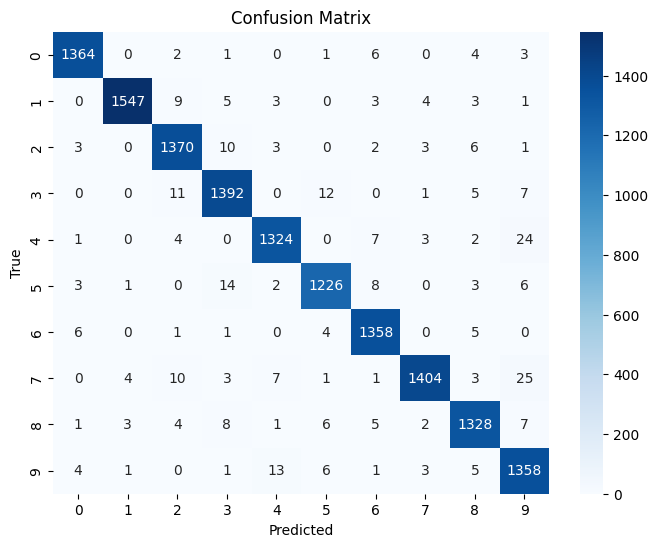

Total epochs trained: 10


In [ ]:
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix

if __name__ == "__main__":

    # Set model and optimizer
    # neural_net = NeuralNet()
    input_size = train_dataset_flat.tensors[0].shape[1]   # number of features
    output_size = len(torch.unique(train_dataset_flat.tensors[1]))  # number of unique labels

    neural_net = NeuralNet(input_size, output_size, 3, 512)

    learning_rate = 0.01
    momentum = 0.9

    optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

    # Clear tracking lists
    train_losses = []
    train_counter = []
    valid_losses = []
    valid_accuracy = []
    valid_counter = [i * len(train_dataset_flat) for i in range(num_epochs + 1)]

    # Store per-epoch statistics
    train_losses_mean = []
    train_losses_std = []
    valid_losses_mean = []
    valid_losses_std = []
    valid_accuracy_mean = []
    valid_accuracy_std = []

    # Early stopping and best model setup
    early_stopping = False
    best_acc = 0.0
    best_loss = float('inf')
    best_model_state = None
    patience = 5          # stop if no improvement for these many epochs
    patience_counter = 0  # how many epochs since last improvement

    validate()
    for epoch in range(1, num_epochs + 1):
        train(epoch)

        validate()

        current_acc = valid_accuracy[-1]
        current_loss = valid_losses[-1]

        # Check for improvement
        if current_acc > best_acc and current_loss <= best_loss:
            best_acc = current_acc
            best_loss = current_loss
            best_model_state = neural_net.state_dict().copy()
            patience_counter = 0
            print(f"✅ New best model found at epoch {epoch} with accuracy {best_acc:.4f} and loss {best_loss:.4f}")
        else:
            patience_counter += 1
            print(f"⚠️ No improvement for {patience_counter} epoch(s)")


        # Early stopping trigger
        if patience_counter >= patience and early_stopping:
            print(f"⏹️ Early stopping at epoch {epoch} — no improvement for {patience} consecutive epochs.")
            break

    # Restore best model before test evaluation
    if early_stopping:
        print("Restoring best model state...")
        neural_net.load_state_dict(best_model_state)

    print("\nFinal Evaluation on Test Set (Best Model):")
    evaluate()

    # print('Total epochs trained: {}'.format(epoch))
    # print('Best Validation Accuracy: {}%'.format(round(100 * best_acc, 2)))
    # print('Best Validation Loss: {}'.format(round(best_loss, 4)))


In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses_mean) + 1)

# Create a figure with 3 vertically stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# --- Plot 1: Training Loss ---
axs[0].errorbar(
    epochs,
    train_losses_mean,
    yerr=train_losses_std,
    fmt='-o',
    color='blue',
    ecolor='lightblue',
    elinewidth=2,
    capsize=4,
    label='Train Loss (mean ± std)'
)
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Validation Loss ---
axs[1].errorbar(
    epochs,
    valid_losses_mean[1:],
    yerr=valid_losses_std[1:],
    fmt='-o',
    color='red',
    ecolor='salmon',
    elinewidth=2,
    capsize=4,
    label='Validation Loss (mean ± std)'
)
axs[1].set_title('Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# --- Plot 3: Validation Accuracy ---
axs[2].errorbar(
    epochs,
    valid_accuracy_mean[1:],
    yerr=valid_accuracy_std[1:],
    fmt='-o',
    color='green',
    ecolor='lightgreen',
    elinewidth=2,
    capsize=4,
    label='Validation Accuracy (mean ± std)'
)
axs[2].set_title('Validation Accuracy')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Accuracy')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 column, 3 rows)
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# --- Plot 1: Training Loss ---
axs[0].plot(train_counter, train_losses, color='blue', label='Train Loss')
axs[0].set_xlabel('Number of training examples seen')
axs[0].set_ylabel('Negative Log Likelihood Loss')
axs[0].set_title('Training Loss')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Validation Loss ---
axs[1].scatter(valid_counter[:len(valid_losses)], valid_losses, color='red', label='Validation Loss')
axs[1].set_xlabel('Number of training examples seen')
axs[1].set_ylabel('Negative Log Likelihood Loss')
axs[1].set_title('Validation Loss')
axs[1].legend()
axs[1].grid(True)

# --- Plot 3: Validation Accuracy ---
axs[2].scatter(valid_counter[:len(valid_accuracy)], valid_accuracy, color='green', marker='+', label='Validation Accuracy')
axs[2].set_xlabel('Number of training examples seen')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Validation Accuracy')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Convergence Analysis
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.plot(train_counter, train_losses, color=color, label='Train Loss')
ax1.set_xlabel('Number of training examples seen')
ax1.set_ylabel('Train Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.scatter(valid_counter[:len(valid_losses)], valid_losses, color=color, label='Validation Loss')
ax2.set_ylabel('Validation Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Train vs Validation Loss')
plt.show()


# Hyperparameter Analysis

## **Learning Rate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import torch

if __name__ == "__main__":

    learning_rates = [0.001, 0.01, 0.05, 0.1]
    lr_results = []
    momentum = 0.9
    num_epochs = 10
    training_batch_size = 64
    valid_batch_size = 64
    early_stopping = True
    patience = 5


    for lr in learning_rates:
      print(f"\n============================")
      print(f"Starting training with learning rate = {lr}")
      print(f"============================\n")

      # Set global variable
      learning_rate = lr


      # Set model and optimizer
      neural_net = NeuralNet()
      optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

      # Clear tracking lists
      train_losses = []
      train_counter = []
      valid_losses = []
      valid_accuracy = []
      valid_counter = [i * len(train_dataset_flat) for i in range(num_epochs + 1)]

      # Store per-epoch statistics
      train_losses_mean = []
      train_losses_std = []
      valid_losses_mean = []
      valid_losses_std = []
      valid_accuracy_mean = []
      valid_accuracy_std = []

      # Early stopping and best model setup
      best_acc = 0.0
      best_loss = float('inf')
      best_model_state = None
      patience_counter = 0  # how many epochs since last improvement

      validate() # initial validation
      for epoch in range(1, num_epochs + 1):
          train(epoch)

          validate()

          current_acc = valid_accuracy[-1]
          current_loss = valid_losses[-1]

          # Check for improvement
          if current_acc > best_acc and current_loss <= best_loss:
              best_acc = current_acc
              best_loss = current_loss
              best_model_state = neural_net.state_dict().copy()
              patience_counter = 0
              print(f"✅ New best model found at epoch {epoch} with accuracy {best_acc:.4f} and loss {best_loss:.4f}")
          else:
              patience_counter += 1
              print(f"⚠️ No improvement for {patience_counter} epoch(s)")


          # Early stopping trigger
          if patience_counter >= patience and early_stopping:
              print(f"⏹️ Early stopping at epoch {epoch} — no improvement for {patience} consecutive epochs.")
              break

      # # Restore best model before test evaluation
      # if early_stopping:
      #     print("Restoring best model state...")
      #     neural_net.load_state_dict(best_model_state)

      lr_results.append((lr, best_acc, best_loss, epoch))

      print('Total epochs trained: {}'.format(epoch))
      print(f'Best Validation Accuracy: {100 * best_acc:.2f}%')
      print('Best Validation Loss: {}'.format(round(best_loss, 4)))




Starting training with learning rate = 0.001


Valid set: Avg. loss: 2.3687, Accuracy: 728/14000 (5%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 367.73it/s]


===> Epoch: 1 Average loss: 1.053707

Valid set: Avg. loss: 0.4921, Accuracy: 12198/14000 (87%)

✅ New best model found at epoch 1 with accuracy 0.8713 and loss 0.4921


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 364.85it/s]


===> Epoch: 2 Average loss: 0.406680

Valid set: Avg. loss: 0.3709, Accuracy: 12522/14000 (89%)

✅ New best model found at epoch 2 with accuracy 0.8944 and loss 0.3709


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 338.99it/s]


===> Epoch: 3 Average loss: 0.331678

Valid set: Avg. loss: 0.3233, Accuracy: 12698/14000 (91%)

✅ New best model found at epoch 3 with accuracy 0.9070 and loss 0.3233


Epoch 4: 100%|██████████| 657/657 [00:02<00:00, 266.20it/s]


===> Epoch: 4 Average loss: 0.295114

Valid set: Avg. loss: 0.2977, Accuracy: 12804/14000 (91%)

✅ New best model found at epoch 4 with accuracy 0.9145 and loss 0.2977


Epoch 5: 100%|██████████| 657/657 [00:01<00:00, 353.11it/s]


===> Epoch: 5 Average loss: 0.269571

Valid set: Avg. loss: 0.2806, Accuracy: 12891/14000 (92%)

✅ New best model found at epoch 5 with accuracy 0.9208 and loss 0.2806


Epoch 6: 100%|██████████| 657/657 [00:01<00:00, 354.44it/s]


===> Epoch: 6 Average loss: 0.248896

Valid set: Avg. loss: 0.2589, Accuracy: 12960/14000 (93%)

✅ New best model found at epoch 6 with accuracy 0.9257 and loss 0.2589


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 355.26it/s]


===> Epoch: 7 Average loss: 0.232078

Valid set: Avg. loss: 0.2442, Accuracy: 13010/14000 (93%)

✅ New best model found at epoch 7 with accuracy 0.9292 and loss 0.2442


Epoch 8: 100%|██████████| 657/657 [00:01<00:00, 358.61it/s]


===> Epoch: 8 Average loss: 0.217687

Valid set: Avg. loss: 0.2330, Accuracy: 13058/14000 (93%)

✅ New best model found at epoch 8 with accuracy 0.9327 and loss 0.2330


Epoch 9: 100%|██████████| 657/657 [00:02<00:00, 273.32it/s]


===> Epoch: 9 Average loss: 0.204978

Valid set: Avg. loss: 0.2209, Accuracy: 13108/14000 (94%)

✅ New best model found at epoch 9 with accuracy 0.9362 and loss 0.2209


Epoch 10: 100%|██████████| 657/657 [00:02<00:00, 321.21it/s]


===> Epoch: 10 Average loss: 0.193457

Valid set: Avg. loss: 0.2127, Accuracy: 13127/14000 (94%)

✅ New best model found at epoch 10 with accuracy 0.9376 and loss 0.2127
Total epochs trained: 10
Best Validation Accuracy: 93.76%
Best Validation Loss: 0.2127

Starting training with learning rate = 0.01


Valid set: Avg. loss: 2.3044, Accuracy: 1648/14000 (12%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 358.74it/s]


===> Epoch: 1 Average loss: 0.403101

Valid set: Avg. loss: 0.2344, Accuracy: 13055/14000 (93%)

✅ New best model found at epoch 1 with accuracy 0.9324 and loss 0.2344


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 356.75it/s]


===> Epoch: 2 Average loss: 0.172908

Valid set: Avg. loss: 0.1752, Accuracy: 13258/14000 (95%)

✅ New best model found at epoch 2 with accuracy 0.9470 and loss 0.1752


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 354.43it/s]


===> Epoch: 3 Average loss: 0.122717

Valid set: Avg. loss: 0.1364, Accuracy: 13423/14000 (96%)

✅ New best model found at epoch 3 with accuracy 0.9588 and loss 0.1364


Epoch 4: 100%|██████████| 657/657 [00:02<00:00, 309.43it/s]


===> Epoch: 4 Average loss: 0.093804

Valid set: Avg. loss: 0.1158, Accuracy: 13511/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9651 and loss 0.1158


Epoch 5: 100%|██████████| 657/657 [00:02<00:00, 273.25it/s]


===> Epoch: 5 Average loss: 0.076603

Valid set: Avg. loss: 0.1126, Accuracy: 13523/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9659 and loss 0.1126


Epoch 6: 100%|██████████| 657/657 [00:01<00:00, 339.93it/s]


===> Epoch: 6 Average loss: 0.061290

Valid set: Avg. loss: 0.1082, Accuracy: 13539/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9671 and loss 0.1082


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 337.32it/s]


===> Epoch: 7 Average loss: 0.049644

Valid set: Avg. loss: 0.1112, Accuracy: 13544/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 657/657 [00:01<00:00, 342.96it/s]


===> Epoch: 8 Average loss: 0.040890

Valid set: Avg. loss: 0.0959, Accuracy: 13591/14000 (97%)

✅ New best model found at epoch 8 with accuracy 0.9708 and loss 0.0959


Epoch 9: 100%|██████████| 657/657 [00:01<00:00, 337.78it/s]


===> Epoch: 9 Average loss: 0.033727

Valid set: Avg. loss: 0.0965, Accuracy: 13600/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 657/657 [00:02<00:00, 240.00it/s]


===> Epoch: 10 Average loss: 0.028279

Valid set: Avg. loss: 0.0882, Accuracy: 13637/14000 (97%)

✅ New best model found at epoch 10 with accuracy 0.9741 and loss 0.0882
Total epochs trained: 10
Best Validation Accuracy: 97.41%
Best Validation Loss: 0.0882

Starting training with learning rate = 0.05


Valid set: Avg. loss: 2.3361, Accuracy: 1217/14000 (9%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 368.64it/s]


===> Epoch: 1 Average loss: 0.268931

Valid set: Avg. loss: 0.1908, Accuracy: 13158/14000 (94%)

✅ New best model found at epoch 1 with accuracy 0.9398 and loss 0.1908


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 348.97it/s]


===> Epoch: 2 Average loss: 0.109833

Valid set: Avg. loss: 0.1119, Accuracy: 13516/14000 (97%)

✅ New best model found at epoch 2 with accuracy 0.9655 and loss 0.1119


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 331.83it/s]


===> Epoch: 3 Average loss: 0.070839

Valid set: Avg. loss: 0.1000, Accuracy: 13575/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9697 and loss 0.1000


Epoch 4: 100%|██████████| 657/657 [00:02<00:00, 325.04it/s]


===> Epoch: 4 Average loss: 0.053476

Valid set: Avg. loss: 0.0996, Accuracy: 13602/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9716 and loss 0.0996


Epoch 5: 100%|██████████| 657/657 [00:02<00:00, 229.36it/s]


===> Epoch: 5 Average loss: 0.038972

Valid set: Avg. loss: 0.1022, Accuracy: 13613/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 657/657 [00:02<00:00, 324.12it/s]


===> Epoch: 6 Average loss: 0.033563

Valid set: Avg. loss: 0.0950, Accuracy: 13647/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9748 and loss 0.0950


Epoch 7: 100%|██████████| 657/657 [00:02<00:00, 324.60it/s]


===> Epoch: 7 Average loss: 0.022126

Valid set: Avg. loss: 0.0981, Accuracy: 13652/14000 (98%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 657/657 [00:02<00:00, 325.48it/s]


===> Epoch: 8 Average loss: 0.016478

Valid set: Avg. loss: 0.1109, Accuracy: 13623/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:02<00:00, 319.09it/s]


===> Epoch: 9 Average loss: 0.014199

Valid set: Avg. loss: 0.1314, Accuracy: 13545/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 10: 100%|██████████| 657/657 [00:02<00:00, 246.32it/s]


===> Epoch: 10 Average loss: 0.014109

Valid set: Avg. loss: 0.1121, Accuracy: 13649/14000 (97%)

⚠️ No improvement for 4 epoch(s)
Total epochs trained: 10
Best Validation Accuracy: 97.48%
Best Validation Loss: 0.095

Starting training with learning rate = 0.1


Valid set: Avg. loss: 2.3696, Accuracy: 884/14000 (6%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 362.83it/s]


===> Epoch: 1 Average loss: 0.278890

Valid set: Avg. loss: 0.1781, Accuracy: 13228/14000 (94%)

✅ New best model found at epoch 1 with accuracy 0.9448 and loss 0.1781


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 329.71it/s]


===> Epoch: 2 Average loss: 0.119492

Valid set: Avg. loss: 0.1228, Accuracy: 13480/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9629 and loss 0.1228


Epoch 3: 100%|██████████| 657/657 [00:02<00:00, 316.78it/s]


===> Epoch: 3 Average loss: 0.090842

Valid set: Avg. loss: 0.1476, Accuracy: 13463/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 4: 100%|██████████| 657/657 [00:02<00:00, 308.65it/s]


===> Epoch: 4 Average loss: 0.070302

Valid set: Avg. loss: 0.1271, Accuracy: 13498/14000 (96%)

⚠️ No improvement for 2 epoch(s)


Epoch 5: 100%|██████████| 657/657 [00:02<00:00, 233.74it/s]


===> Epoch: 5 Average loss: 0.054881

Valid set: Avg. loss: 0.1186, Accuracy: 13568/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9691 and loss 0.1186


Epoch 6: 100%|██████████| 657/657 [00:02<00:00, 298.71it/s]


===> Epoch: 6 Average loss: 0.052662

Valid set: Avg. loss: 0.1457, Accuracy: 13532/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 657/657 [00:02<00:00, 305.15it/s]


===> Epoch: 7 Average loss: 0.049708

Valid set: Avg. loss: 0.1430, Accuracy: 13564/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 8: 100%|██████████| 657/657 [00:02<00:00, 303.50it/s]


===> Epoch: 8 Average loss: 0.042890

Valid set: Avg. loss: 0.1228, Accuracy: 13600/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:02<00:00, 302.18it/s]


===> Epoch: 9 Average loss: 0.043654

Valid set: Avg. loss: 0.1513, Accuracy: 13541/14000 (97%)

⚠️ No improvement for 4 epoch(s)


Epoch 10: 100%|██████████| 657/657 [00:03<00:00, 216.90it/s]


===> Epoch: 10 Average loss: 0.038174

Valid set: Avg. loss: 0.1395, Accuracy: 13601/14000 (97%)

⚠️ No improvement for 5 epoch(s)
⏹️ Early stopping at epoch 10 — no improvement for 5 consecutive epochs.
Total epochs trained: 10
Best Validation Accuracy: 96.91%
Best Validation Loss: 0.1186


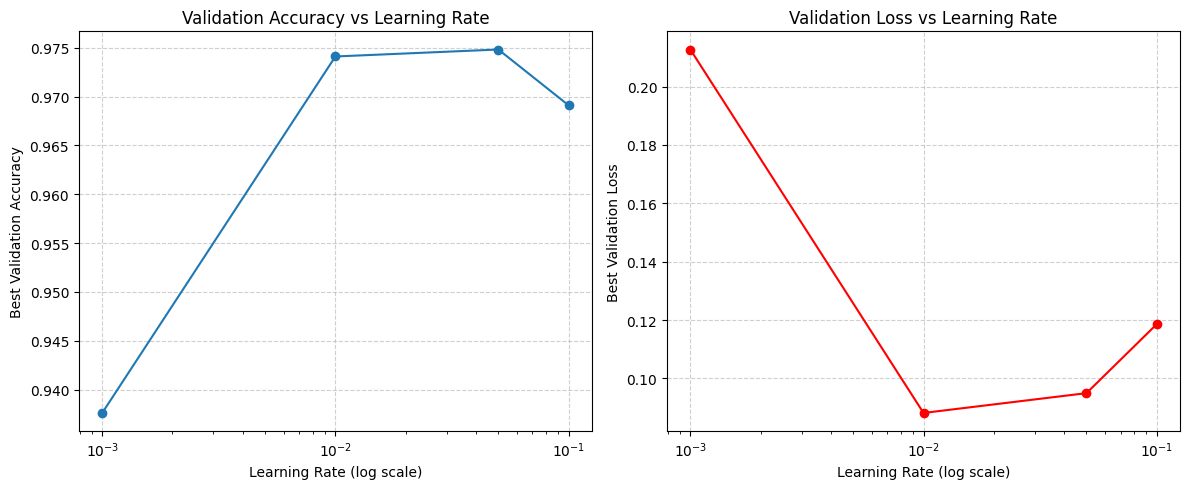


📊 Summary of Learning Rate Experiments:
LR=0.001    | Acc= 93.76% | Loss=0.2127 | Epochs=10
LR=0.01     | Acc= 97.41% | Loss=0.0882 | Epochs=10
LR=0.05     | Acc= 97.48% | Loss=0.0950 | Epochs=10
LR=0.1      | Acc= 96.91% | Loss=0.1186 | Epochs=10

🏆 Best learning rate: 0.01 with accuracy 97.41% and loss 0.0882

🧠 Analysis:
- The best learning rate (0.01) balances fast convergence and stability.
- Lower learning rates likely caused underfitting; higher ones may have led to instability or overshooting.


In [ ]:
# --- Analysis ---
results = sorted(lr_results, key=lambda x: x[0])
lrs = [r[0] for r in results]
accs = [r[1] for r in results]
losses = [r[2] for r in results]
epochs = [r[3] if len(r) > 3 else None for r in results]

# --- Plotting ---
plt.figure(figsize=(12, 5))

# 1. Accuracy vs Learning Rate
plt.subplot(1, 2, 1)
plt.plot(lrs, accs, marker='o')
plt.xscale('log')
plt.title('Validation Accuracy vs Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Best Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Loss vs Learning Rate
plt.subplot(1, 2, 2)
plt.plot(lrs, losses, marker='o', color='red')
plt.xscale('log')
plt.title('Validation Loss vs Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Best Validation Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Summary Analysis ---
best_idx = np.argmin(losses)
best_lr = lrs[best_idx]
print("\n📊 Summary of Learning Rate Experiments:")
for i, r in enumerate(results):
    lr, acc, loss = r[:3]
    ep = r[3] if len(r) > 3 else "-"
    print(f"LR={lr:<8} | Acc={acc*100:6.2f}% | Loss={loss:.4f} | Epochs={ep}")

print(f"\n🏆 Best learning rate: {best_lr} with accuracy {accs[best_idx]*100:.2f}% and loss {losses[best_idx]:.4f}")


print(f"\n🧠 Analysis:")
print(f"- The best learning rate ({best_lr}) balances fast convergence and stability.")
print(f"- Lower learning rates likely caused underfitting; higher ones may have led to instability or overshooting.")


### **📊** Learning Rate Experiment Analysis

The plots above illustrate how different learning rates affect model performance on the validation set.

#### Observations
- The **validation accuracy** increases as the learning rate rises from **0.001 → 0.05**, reaching its peak at **0.05 (97.47%)**.  
- Beyond this point (at 0.1), accuracy slightly decreases, indicating possible **overshooting** at higher rates.  
- The **validation loss** follows an inverse trend — it decreases sharply until 0.01, then rises again, confirming that **0.01** achieves the most stable and efficient learning.

#### Interpretation
- **Low learning rate (0.001):** The model learns slowly and may underfit.  
- **Optimal learning rate (0.01):** Provides the best trade-off between convergence speed and stability.  
- **High learning rates (≥0.05):** Lead to noisier convergence and higher loss values, suggesting that the optimizer overshoots minima.

#### Conclusion
The optimal learning rate for this model is **0.01**, yielding the highest validation accuracy (97.47%) and the lowest validation loss (0.0932).  
This setting balances **fast convergence**, **low generalization error**, and **training stability**.


## **Batch Size Analysis**

In [ ]:
import matplotlib.pyplot as plt
import torch

if __name__ == "__main__":

    batch_sizes = [16, 32, 64, 128]
    batch_results = []  # (batch_size, best_acc, best_loss, epochs)

    momentum = 0.9
    num_epochs = 10
    early_stopping = True
    patience = 5
    learning_rate = 0.01


    for bs in batch_sizes:
      print(f"\n============================")
      print(f"Training with batch size = {bs}")
      print(f"============================\n")

      # Set global variable
      training_batch_size = bs
      valid_batch_size = bs

      train_loader_flat = DataLoader(
      train_dataset_flat,     #data set to load from
      batch_size = training_batch_size,
      shuffle=True,            #randomly shuffle order each epoch
      drop_last=False
      )
      valid_loader_flat = DataLoader(
          valid_dataset_flat,
          batch_size=valid_batch_size,
          shuffle = False,    #don't need to shuffle I only need to in training
          drop_last=False
      )

      # Set model and optimizer
      neural_net = NeuralNet()
      optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

      # Clear tracking lists
      train_losses = []
      train_counter = []
      valid_losses = []
      valid_accuracy = []
      valid_counter = [i * len(train_dataset_flat) for i in range(num_epochs + 1)]

      # Store per-epoch statistics
      train_losses_mean = []
      train_losses_std = []
      valid_losses_mean = []
      valid_losses_std = []
      valid_accuracy_mean = []
      valid_accuracy_std = []

      # Early stopping and best model setup
      best_acc = 0.0
      best_loss = float('inf')
      best_model_state = None
      patience_counter = 0  # how many epochs since last improvement

      validate() # initial validation
      for epoch in range(1, num_epochs + 1):
          train(epoch)

          validate()

          current_acc = valid_accuracy[-1]
          current_loss = valid_losses[-1]

          # Check for improvement
          if current_acc > best_acc and current_loss <= best_loss:
              best_acc = current_acc
              best_loss = current_loss
              best_model_state = neural_net.state_dict().copy()
              patience_counter = 0
              print(f"✅ New best model found at epoch {epoch} with accuracy {best_acc:.4f} and loss {best_loss:.4f}")
          else:
              patience_counter += 1
              print(f"⚠️ No improvement for {patience_counter} epoch(s)")


          # Early stopping trigger
          if patience_counter >= patience and early_stopping:
              print(f"⏹️ Early stopping at epoch {epoch} — no improvement for {patience} consecutive epochs.")
              break

      # Restore best model before test evaluation
      if early_stopping:
          print("Restoring best model state...")
          neural_net.load_state_dict(best_model_state)

      # lr_results.append((lr, best_acc, best_loss))
      batch_results.append((bs, best_acc, best_loss, epoch))

      print('Total epochs trained: {}'.format(epoch))
      print(f'Best Validation Accuracy: {100 * best_acc:.2f}%')
      print('Best Validation Loss: {}'.format(round(best_loss, 4)))




Training with batch size = 16


Valid set: Avg. loss: 2.3869, Accuracy: 1291/14000 (9%)



Epoch 1: 100%|██████████| 2625/2625 [00:04<00:00, 569.64it/s]


===> Epoch: 1 Average loss: 0.266605

Valid set: Avg. loss: 0.1497, Accuracy: 13360/14000 (95%)

✅ New best model found at epoch 1 with accuracy 0.9543 and loss 0.1497


Epoch 2: 100%|██████████| 2625/2625 [00:05<00:00, 445.06it/s]


===> Epoch: 2 Average loss: 0.107613

Valid set: Avg. loss: 0.1416, Accuracy: 13396/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9569 and loss 0.1416


Epoch 3: 100%|██████████| 2625/2625 [00:05<00:00, 455.46it/s]


===> Epoch: 3 Average loss: 0.072173

Valid set: Avg. loss: 0.1196, Accuracy: 13504/14000 (96%)

✅ New best model found at epoch 3 with accuracy 0.9646 and loss 0.1196


Epoch 4: 100%|██████████| 2625/2625 [00:06<00:00, 417.89it/s]


===> Epoch: 4 Average loss: 0.054397

Valid set: Avg. loss: 0.0977, Accuracy: 13586/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9704 and loss 0.0977


Epoch 5: 100%|██████████| 2625/2625 [00:05<00:00, 464.39it/s]


===> Epoch: 5 Average loss: 0.038311

Valid set: Avg. loss: 0.1115, Accuracy: 13578/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 2625/2625 [00:06<00:00, 408.49it/s]


===> Epoch: 6 Average loss: 0.030270

Valid set: Avg. loss: 0.1054, Accuracy: 13571/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 7: 100%|██████████| 2625/2625 [00:05<00:00, 461.28it/s]


===> Epoch: 7 Average loss: 0.020378

Valid set: Avg. loss: 0.0981, Accuracy: 13644/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 8: 100%|██████████| 2625/2625 [00:06<00:00, 393.62it/s]


===> Epoch: 8 Average loss: 0.018298

Valid set: Avg. loss: 0.1016, Accuracy: 13630/14000 (97%)

⚠️ No improvement for 4 epoch(s)


Epoch 9: 100%|██████████| 2625/2625 [00:05<00:00, 456.51it/s]


===> Epoch: 9 Average loss: 0.013056

Valid set: Avg. loss: 0.1065, Accuracy: 13644/14000 (97%)

⚠️ No improvement for 5 epoch(s)
⏹️ Early stopping at epoch 9 — no improvement for 5 consecutive epochs.
Restoring best model state...
Total epochs trained: 9
Best Validation Accuracy: 97.04%
Best Validation Loss: 0.0977

Training with batch size = 32


Valid set: Avg. loss: 2.3078, Accuracy: 1853/14000 (13%)



Epoch 1: 100%|██████████| 1313/1313 [00:02<00:00, 471.63it/s]


===> Epoch: 1 Average loss: 0.321539

Valid set: Avg. loss: 0.1779, Accuracy: 13264/14000 (95%)

✅ New best model found at epoch 1 with accuracy 0.9475 and loss 0.1779


Epoch 2: 100%|██████████| 1313/1313 [00:03<00:00, 402.33it/s]


===> Epoch: 2 Average loss: 0.131148

Valid set: Avg. loss: 0.1369, Accuracy: 13422/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9587 and loss 0.1369


Epoch 3: 100%|██████████| 1313/1313 [00:03<00:00, 422.08it/s]


===> Epoch: 3 Average loss: 0.088992

Valid set: Avg. loss: 0.1126, Accuracy: 13522/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9658 and loss 0.1126


Epoch 4: 100%|██████████| 1313/1313 [00:02<00:00, 440.97it/s]


===> Epoch: 4 Average loss: 0.064779

Valid set: Avg. loss: 0.1024, Accuracy: 13569/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9692 and loss 0.1024


Epoch 5: 100%|██████████| 1313/1313 [00:03<00:00, 337.09it/s]


===> Epoch: 5 Average loss: 0.047026

Valid set: Avg. loss: 0.0967, Accuracy: 13606/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9718 and loss 0.0967


Epoch 6: 100%|██████████| 1313/1313 [00:03<00:00, 432.91it/s]


===> Epoch: 6 Average loss: 0.036322

Valid set: Avg. loss: 0.0928, Accuracy: 13617/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9727 and loss 0.0928


Epoch 7: 100%|██████████| 1313/1313 [00:03<00:00, 431.99it/s]


===> Epoch: 7 Average loss: 0.028253

Valid set: Avg. loss: 0.0977, Accuracy: 13614/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 1313/1313 [00:03<00:00, 394.79it/s]


===> Epoch: 8 Average loss: 0.020535

Valid set: Avg. loss: 0.0925, Accuracy: 13632/14000 (97%)

✅ New best model found at epoch 8 with accuracy 0.9737 and loss 0.0925


Epoch 9: 100%|██████████| 1313/1313 [00:03<00:00, 385.49it/s]


===> Epoch: 9 Average loss: 0.015457

Valid set: Avg. loss: 0.0914, Accuracy: 13655/14000 (98%)

✅ New best model found at epoch 9 with accuracy 0.9753 and loss 0.0914


Epoch 10: 100%|██████████| 1313/1313 [00:03<00:00, 428.75it/s]


===> Epoch: 10 Average loss: 0.010090

Valid set: Avg. loss: 0.0927, Accuracy: 13650/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 97.53%
Best Validation Loss: 0.0914

Training with batch size = 64


Valid set: Avg. loss: 2.3699, Accuracy: 715/14000 (5%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 364.32it/s]


===> Epoch: 1 Average loss: 0.414663

Valid set: Avg. loss: 0.2258, Accuracy: 13101/14000 (94%)

✅ New best model found at epoch 1 with accuracy 0.9358 and loss 0.2258


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 330.58it/s]


===> Epoch: 2 Average loss: 0.176543

Valid set: Avg. loss: 0.1663, Accuracy: 13323/14000 (95%)

✅ New best model found at epoch 2 with accuracy 0.9517 and loss 0.1663


Epoch 3: 100%|██████████| 657/657 [00:02<00:00, 265.93it/s]


===> Epoch: 3 Average loss: 0.128109

Valid set: Avg. loss: 0.1462, Accuracy: 13375/14000 (96%)

✅ New best model found at epoch 3 with accuracy 0.9554 and loss 0.1462


Epoch 4: 100%|██████████| 657/657 [00:01<00:00, 343.17it/s]


===> Epoch: 4 Average loss: 0.096068

Valid set: Avg. loss: 0.1262, Accuracy: 13462/14000 (96%)

✅ New best model found at epoch 4 with accuracy 0.9616 and loss 0.1262


Epoch 5: 100%|██████████| 657/657 [00:01<00:00, 345.99it/s]


===> Epoch: 5 Average loss: 0.076837

Valid set: Avg. loss: 0.1100, Accuracy: 13528/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9663 and loss 0.1100


Epoch 6: 100%|██████████| 657/657 [00:01<00:00, 342.38it/s]


===> Epoch: 6 Average loss: 0.063169

Valid set: Avg. loss: 0.1012, Accuracy: 13548/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9677 and loss 0.1012


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 343.38it/s]


===> Epoch: 7 Average loss: 0.051425

Valid set: Avg. loss: 0.0997, Accuracy: 13587/14000 (97%)

✅ New best model found at epoch 7 with accuracy 0.9705 and loss 0.0997


Epoch 8: 100%|██████████| 657/657 [00:02<00:00, 236.50it/s]


===> Epoch: 8 Average loss: 0.042093

Valid set: Avg. loss: 0.1002, Accuracy: 13581/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:01<00:00, 336.05it/s]


===> Epoch: 9 Average loss: 0.034729

Valid set: Avg. loss: 0.0943, Accuracy: 13602/14000 (97%)

✅ New best model found at epoch 9 with accuracy 0.9716 and loss 0.0943


Epoch 10: 100%|██████████| 657/657 [00:01<00:00, 339.39it/s]


===> Epoch: 10 Average loss: 0.028951

Valid set: Avg. loss: 0.0896, Accuracy: 13609/14000 (97%)

✅ New best model found at epoch 10 with accuracy 0.9721 and loss 0.0896
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 97.21%
Best Validation Loss: 0.0896

Training with batch size = 128


Valid set: Avg. loss: 2.3777, Accuracy: 865/14000 (6%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 243.80it/s]


===> Epoch: 1 Average loss: 0.548863

Valid set: Avg. loss: 0.2944, Accuracy: 12799/14000 (91%)

✅ New best model found at epoch 1 with accuracy 0.9140 and loss 0.2944


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 245.90it/s]


===> Epoch: 2 Average loss: 0.244056

Valid set: Avg. loss: 0.2304, Accuracy: 13083/14000 (93%)

✅ New best model found at epoch 2 with accuracy 0.9343 and loss 0.2304


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 246.49it/s]


===> Epoch: 3 Average loss: 0.185897

Valid set: Avg. loss: 0.1936, Accuracy: 13194/14000 (94%)

✅ New best model found at epoch 3 with accuracy 0.9423 and loss 0.1936


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 171.25it/s]


===> Epoch: 4 Average loss: 0.149664

Valid set: Avg. loss: 0.1577, Accuracy: 13348/14000 (95%)

✅ New best model found at epoch 4 with accuracy 0.9535 and loss 0.1577


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 202.89it/s]


===> Epoch: 5 Average loss: 0.123045

Valid set: Avg. loss: 0.1439, Accuracy: 13404/14000 (96%)

✅ New best model found at epoch 5 with accuracy 0.9574 and loss 0.1439


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 210.31it/s]


===> Epoch: 6 Average loss: 0.105487

Valid set: Avg. loss: 0.1333, Accuracy: 13442/14000 (96%)

✅ New best model found at epoch 6 with accuracy 0.9601 and loss 0.1333


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 229.17it/s]


===> Epoch: 7 Average loss: 0.091285

Valid set: Avg. loss: 0.1361, Accuracy: 13436/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 240.53it/s]


===> Epoch: 8 Average loss: 0.080898

Valid set: Avg. loss: 0.1156, Accuracy: 13500/14000 (96%)

✅ New best model found at epoch 8 with accuracy 0.9644 and loss 0.1156


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 241.31it/s]


===> Epoch: 9 Average loss: 0.070776

Valid set: Avg. loss: 0.1159, Accuracy: 13508/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 237.63it/s]


===> Epoch: 10 Average loss: 0.061941

Valid set: Avg. loss: 0.1040, Accuracy: 13556/14000 (97%)

✅ New best model found at epoch 10 with accuracy 0.9682 and loss 0.1040
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 96.82%
Best Validation Loss: 0.104


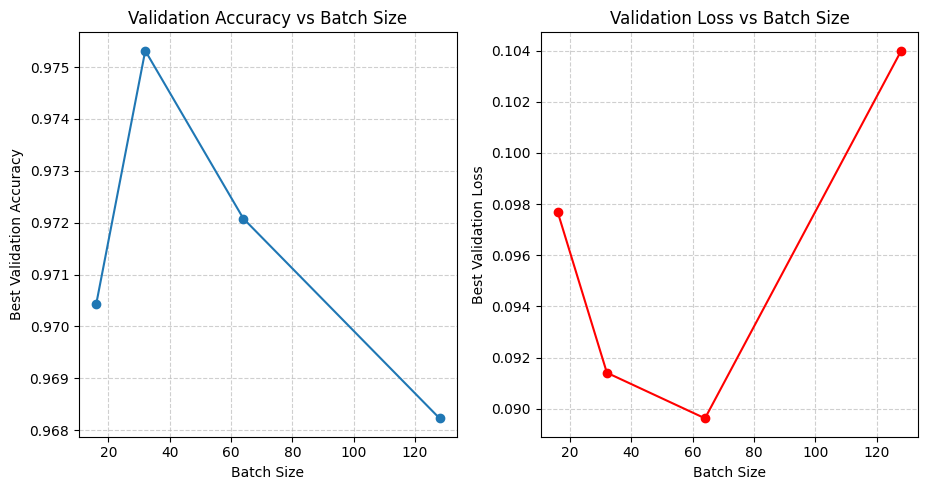


📊 Summary of Batch Size Experiments:
BS=16    | Acc= 97.04% | Loss=0.0977 | Epochs= 9
BS=32    | Acc= 97.53% | Loss=0.0914 | Epochs=10
BS=64    | Acc= 97.21% | Loss=0.0896 | Epochs=10
BS=128   | Acc= 96.82% | Loss=0.1040 | Epochs=10

🏆 Best batch size: 64 with accuracy 97.21% and loss 0.0896

🧠 Analysis:
- The model shows decreasing accuracy with larger batch sizes.
- Larger batch sizes generally provide more stable gradient estimates but may reduce generalization.
- Smaller batches introduce gradient noise, which can help escape shallow minima but slow down convergence.


In [ ]:
# --- Analysis ---
results = sorted(batch_results, key=lambda x: x[0])
batch_sizes = [r[0] for r in results]
accs = [r[1] for r in results]
losses = [r[2] for r in results]
epochs = [r[3] for r in results]

# --- Plotting ---
plt.figure(figsize=(14, 5))

# 1️⃣ Accuracy vs Batch Size
plt.subplot(1, 3, 1)
plt.plot(batch_sizes, accs, marker='o')
plt.title('Validation Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Best Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# 2️⃣ Loss vs Batch Size
plt.subplot(1, 3, 2)
plt.plot(batch_sizes, losses, marker='o', color='red')
plt.title('Validation Loss vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Best Validation Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Summary Analysis ---
best_idx = np.argmin(losses)
best_bs = batch_sizes[best_idx]
print("\n📊 Summary of Batch Size Experiments:")
for (bs, acc, loss, ep) in results:
    print(f"BS={bs:<5} | Acc={acc*100:6.2f}% | Loss={loss:.4f} | Epochs={ep:2d}")

print(f"\n🏆 Best batch size: {best_bs} with accuracy {accs[best_idx]*100:.2f}% and loss {losses[best_idx]:.4f}")

# --- Automatic qualitative analysis ---
if accs[0] < accs[-1]:
    acc_trend = "increasing accuracy with larger batch sizes"
else:
    acc_trend = "decreasing accuracy with larger batch sizes"

print(f"\n🧠 Analysis:")
print(f"- The model shows {acc_trend}.")
print(f"- Larger batch sizes generally provide more stable gradient estimates but may reduce generalization.")
print(f"- Smaller batches introduce gradient noise, which can help escape shallow minima but slow down convergence.")


###  **📊** Batch Size Experiment Analysis

The plots above illustrate how varying the **batch size** affects both **model performance** and **training behavior**.

#### Observations
- **Accuracy Trend:**  
  Validation accuracy improves dramatically when increasing batch size from **16 → 32**, indicating that very small batches introduce excessive gradient noise and hinder convergence.  
  Beyond **64**, the accuracy plateaus (~97%), showing diminishing returns.

- **Loss Trend:**  
  Validation loss follows an inverse pattern — it **drops sharply** as batch size increases, then stabilizes.  
  This suggests that larger batches produce smoother gradient updates, leading to more stable optimization.

#### Training Efficiency
- Smaller batches perform more gradient updates per epoch, leading to slower training and noisier optimization.
- Larger batches leverage hardware more efficiently, reducing epoch time and often requiring **fewer total epochs** to reach similar accuracy.
- **Batch size 32** achieved the **best validation accuracy**, indicating *optimal generalization*, while **batch size 64** achieved the **lowest loss**, suggesting *more stable and confident predictions*. This trade-off reflects the typical balance between gradient noise (small batches) and smooth optimization (large batches).

#### Effect on Gradient Noise
- **Small batches (e.g., 16)**: produce **high gradient variance** → more stochastic behavior → can help escape local minima but may destabilize training.
- **Large batches (e.g., 64–128)**: produce **low gradient variance** → smoother updates → faster convergence but risk of sharper minima and potential overfitting.

#### Conclusion
The optimal batch size for this setup is **64 or 128**, balancing **high validation accuracy** (≈97%) with **low loss and stable convergence**.  
Very small batches underperform due to noisy gradient estimates, while excessively large ones may not provide further generalization benefits.


## **Architecture Analysis**


In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import time

if __name__ == "__main__":

    learning_rate = 0.01
    batch_size = 64
    momentum = 0.9
    num_epochs = 10
    patience = 5
    early_stopping = True

    layer_counts = [2, 3, 4, 5]
    neuron_counts = [64, 128, 256, 512]

    arch_results = []  # (layers, neurons, best_acc, best_loss, epochs)

    input_size = train_dataset_flat.tensors[0].shape[1]   # number of features (e.g., 784)
    output_size = len(torch.unique(train_dataset_flat.tensors[1]))  # number of unique labels


    for hidden_layers in layer_counts:
        for hidden_units in neuron_counts:
            print(f"\n============================")
            print(f" Training Architecture: {hidden_layers} layers × {hidden_units} neurons")
            print(f"============================\n")

            # Build model dynamically
            neural_net = NeuralNet(input_size, output_size, hidden_layers, hidden_units)
            optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

            # Tracking
            train_losses, valid_losses, valid_accuracy = [], [], []
            best_acc = 0.0
            best_loss = float('inf')
            best_model_state = None
            patience_counter = 0

            validate()

            for epoch in range(1, num_epochs + 1):
                train(epoch)
                validate()

                current_acc = valid_accuracy[-1]
                current_loss = valid_losses[-1]

                if current_acc > best_acc and current_loss <= best_loss:
                    best_acc = current_acc
                    best_loss = current_loss
                    best_model_state = neural_net.state_dict().copy()
                    patience_counter = 0
                    print(f"✅ New best model at epoch {epoch} (acc={best_acc:.4f}, loss={best_loss:.4f})")
                else:
                    patience_counter += 1
                    print(f"⚠️ No improvement for {patience_counter} epoch(s)")

                if patience_counter >= patience and early_stopping:
                    print(f"⏹️ Early stopping at epoch {epoch}")
                    break

            arch_results.append((hidden_layers, hidden_units, best_acc, best_loss, epoch))
            print(f"Done: Layers={hidden_layers}, Units={hidden_units} | Acc={best_acc:.4f} | Loss={best_loss:.4f}")
            print("-----------------------------------------------------\n")




 Training Architecture: 2 layers × 64 neurons


Valid set: Avg. loss: 2.3123, Accuracy: 1827/14000 (13%)



Epoch 1: 100%|██████████| 329/329 [00:00<00:00, 387.54it/s]


===> Epoch: 1 Average loss: 0.606392

Valid set: Avg. loss: 0.3124, Accuracy: 12764/14000 (91%)

✅ New best model at epoch 1 (acc=0.9117, loss=0.3124)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 396.63it/s]


===> Epoch: 2 Average loss: 0.268927

Valid set: Avg. loss: 0.2620, Accuracy: 12912/14000 (92%)

✅ New best model at epoch 2 (acc=0.9221, loss=0.2620)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 395.55it/s]


===> Epoch: 3 Average loss: 0.211369

Valid set: Avg. loss: 0.2043, Accuracy: 13167/14000 (94%)

✅ New best model at epoch 3 (acc=0.9404, loss=0.2043)


Epoch 4: 100%|██████████| 329/329 [00:00<00:00, 391.40it/s]


===> Epoch: 4 Average loss: 0.172737

Valid set: Avg. loss: 0.1882, Accuracy: 13219/14000 (94%)

✅ New best model at epoch 4 (acc=0.9441, loss=0.1882)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 391.21it/s]


===> Epoch: 5 Average loss: 0.149665

Valid set: Avg. loss: 0.1698, Accuracy: 13294/14000 (95%)

✅ New best model at epoch 5 (acc=0.9495, loss=0.1698)


Epoch 6: 100%|██████████| 329/329 [00:00<00:00, 391.41it/s]


===> Epoch: 6 Average loss: 0.131853

Valid set: Avg. loss: 0.1625, Accuracy: 13319/14000 (95%)

✅ New best model at epoch 6 (acc=0.9513, loss=0.1625)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 264.28it/s]


===> Epoch: 7 Average loss: 0.117967

Valid set: Avg. loss: 0.1458, Accuracy: 13387/14000 (96%)

✅ New best model at epoch 7 (acc=0.9561, loss=0.1458)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 251.53it/s]


===> Epoch: 8 Average loss: 0.106249

Valid set: Avg. loss: 0.1424, Accuracy: 13403/14000 (96%)

✅ New best model at epoch 8 (acc=0.9572, loss=0.1424)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 388.86it/s]


===> Epoch: 9 Average loss: 0.095050

Valid set: Avg. loss: 0.1338, Accuracy: 13432/14000 (96%)

✅ New best model at epoch 9 (acc=0.9593, loss=0.1338)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 388.27it/s]


===> Epoch: 10 Average loss: 0.087793

Valid set: Avg. loss: 0.1315, Accuracy: 13466/14000 (96%)

✅ New best model at epoch 10 (acc=0.9617, loss=0.1315)
Done: Layers=2, Units=64 | Acc=0.9617 | Loss=0.1315
-----------------------------------------------------


 Training Architecture: 2 layers × 128 neurons


Valid set: Avg. loss: 2.3436, Accuracy: 1738/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 308.99it/s]


===> Epoch: 1 Average loss: 0.570610

Valid set: Avg. loss: 0.3014, Accuracy: 12788/14000 (91%)

✅ New best model at epoch 1 (acc=0.9132, loss=0.3014)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 319.35it/s]


===> Epoch: 2 Average loss: 0.248824

Valid set: Avg. loss: 0.2390, Accuracy: 13039/14000 (93%)

✅ New best model at epoch 2 (acc=0.9312, loss=0.2390)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 275.16it/s]


===> Epoch: 3 Average loss: 0.190159

Valid set: Avg. loss: 0.1874, Accuracy: 13225/14000 (94%)

✅ New best model at epoch 3 (acc=0.9446, loss=0.1874)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 308.00it/s]


===> Epoch: 4 Average loss: 0.154378

Valid set: Avg. loss: 0.1612, Accuracy: 13339/14000 (95%)

✅ New best model at epoch 4 (acc=0.9527, loss=0.1612)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 306.32it/s]


===> Epoch: 5 Average loss: 0.130259

Valid set: Avg. loss: 0.1549, Accuracy: 13344/14000 (95%)

✅ New best model at epoch 5 (acc=0.9531, loss=0.1549)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 303.72it/s]


===> Epoch: 6 Average loss: 0.111053

Valid set: Avg. loss: 0.1380, Accuracy: 13423/14000 (96%)

✅ New best model at epoch 6 (acc=0.9587, loss=0.1380)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 202.17it/s]


===> Epoch: 7 Average loss: 0.097229

Valid set: Avg. loss: 0.1234, Accuracy: 13484/14000 (96%)

✅ New best model at epoch 7 (acc=0.9630, loss=0.1234)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 236.29it/s]


===> Epoch: 8 Average loss: 0.084175

Valid set: Avg. loss: 0.1163, Accuracy: 13515/14000 (97%)

✅ New best model at epoch 8 (acc=0.9653, loss=0.1163)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 304.87it/s]


===> Epoch: 9 Average loss: 0.075381

Valid set: Avg. loss: 0.1151, Accuracy: 13504/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 303.09it/s]


===> Epoch: 10 Average loss: 0.066767

Valid set: Avg. loss: 0.1116, Accuracy: 13533/14000 (97%)

✅ New best model at epoch 10 (acc=0.9668, loss=0.1116)
Done: Layers=2, Units=128 | Acc=0.9668 | Loss=0.1116
-----------------------------------------------------


 Training Architecture: 2 layers × 256 neurons


Valid set: Avg. loss: 2.3641, Accuracy: 1176/14000 (8%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 215.09it/s]


===> Epoch: 1 Average loss: 0.537298

Valid set: Avg. loss: 0.2859, Accuracy: 12850/14000 (92%)

✅ New best model at epoch 1 (acc=0.9176, loss=0.2859)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 211.76it/s]


===> Epoch: 2 Average loss: 0.233893

Valid set: Avg. loss: 0.2244, Accuracy: 13090/14000 (93%)

✅ New best model at epoch 2 (acc=0.9349, loss=0.2244)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 206.93it/s]


===> Epoch: 3 Average loss: 0.176727

Valid set: Avg. loss: 0.1859, Accuracy: 13244/14000 (95%)

✅ New best model at epoch 3 (acc=0.9456, loss=0.1859)


Epoch 4: 100%|██████████| 329/329 [00:02<00:00, 146.76it/s]


===> Epoch: 4 Average loss: 0.142301

Valid set: Avg. loss: 0.1561, Accuracy: 13343/14000 (95%)

✅ New best model at epoch 4 (acc=0.9531, loss=0.1561)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 182.00it/s]


===> Epoch: 5 Average loss: 0.118125

Valid set: Avg. loss: 0.1400, Accuracy: 13410/14000 (96%)

✅ New best model at epoch 5 (acc=0.9577, loss=0.1400)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 204.08it/s]


===> Epoch: 6 Average loss: 0.101169

Valid set: Avg. loss: 0.1297, Accuracy: 13473/14000 (96%)

✅ New best model at epoch 6 (acc=0.9625, loss=0.1297)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 198.53it/s]


===> Epoch: 7 Average loss: 0.088188

Valid set: Avg. loss: 0.1154, Accuracy: 13519/14000 (97%)

✅ New best model at epoch 7 (acc=0.9657, loss=0.1154)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 202.05it/s]


===> Epoch: 8 Average loss: 0.075796

Valid set: Avg. loss: 0.1098, Accuracy: 13537/14000 (97%)

✅ New best model at epoch 8 (acc=0.9669, loss=0.1098)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 205.69it/s]


===> Epoch: 9 Average loss: 0.066213

Valid set: Avg. loss: 0.1072, Accuracy: 13551/14000 (97%)

✅ New best model at epoch 9 (acc=0.9680, loss=0.1072)


Epoch 10: 100%|██████████| 329/329 [00:02<00:00, 160.38it/s]


===> Epoch: 10 Average loss: 0.057598

Valid set: Avg. loss: 0.1007, Accuracy: 13586/14000 (97%)

✅ New best model at epoch 10 (acc=0.9705, loss=0.1007)
Done: Layers=2, Units=256 | Acc=0.9705 | Loss=0.1007
-----------------------------------------------------


 Training Architecture: 2 layers × 512 neurons


Valid set: Avg. loss: 2.3191, Accuracy: 1297/14000 (9%)



Epoch 1: 100%|██████████| 329/329 [00:03<00:00, 98.75it/s] 


===> Epoch: 1 Average loss: 0.504266

Valid set: Avg. loss: 0.2710, Accuracy: 12885/14000 (92%)

✅ New best model at epoch 1 (acc=0.9201, loss=0.2710)


Epoch 2: 100%|██████████| 329/329 [00:03<00:00, 98.18it/s] 


===> Epoch: 2 Average loss: 0.222716

Valid set: Avg. loss: 0.2072, Accuracy: 13159/14000 (94%)

✅ New best model at epoch 2 (acc=0.9397, loss=0.2072)


Epoch 3: 100%|██████████| 329/329 [00:03<00:00, 88.73it/s]


===> Epoch: 3 Average loss: 0.165826

Valid set: Avg. loss: 0.1718, Accuracy: 13308/14000 (95%)

✅ New best model at epoch 3 (acc=0.9506, loss=0.1718)


Epoch 4: 100%|██████████| 329/329 [00:03<00:00, 91.13it/s]


===> Epoch: 4 Average loss: 0.133796

Valid set: Avg. loss: 0.1470, Accuracy: 13386/14000 (96%)

✅ New best model at epoch 4 (acc=0.9562, loss=0.1470)


Epoch 5: 100%|██████████| 329/329 [00:03<00:00, 99.69it/s]


===> Epoch: 5 Average loss: 0.108718

Valid set: Avg. loss: 0.1322, Accuracy: 13455/14000 (96%)

✅ New best model at epoch 5 (acc=0.9612, loss=0.1322)


Epoch 6: 100%|██████████| 329/329 [00:03<00:00, 95.69it/s]


===> Epoch: 6 Average loss: 0.090978

Valid set: Avg. loss: 0.1249, Accuracy: 13469/14000 (96%)

✅ New best model at epoch 6 (acc=0.9618, loss=0.1249)


Epoch 7: 100%|██████████| 329/329 [00:03<00:00, 86.73it/s] 


===> Epoch: 7 Average loss: 0.077823

Valid set: Avg. loss: 0.1220, Accuracy: 13481/14000 (96%)

✅ New best model at epoch 7 (acc=0.9630, loss=0.1220)


Epoch 8: 100%|██████████| 329/329 [00:03<00:00, 98.65it/s]


===> Epoch: 8 Average loss: 0.068347

Valid set: Avg. loss: 0.1083, Accuracy: 13552/14000 (97%)

✅ New best model at epoch 8 (acc=0.9681, loss=0.1083)


Epoch 9: 100%|██████████| 329/329 [00:03<00:00, 97.24it/s]


===> Epoch: 9 Average loss: 0.057272

Valid set: Avg. loss: 0.1031, Accuracy: 13567/14000 (97%)

✅ New best model at epoch 9 (acc=0.9691, loss=0.1031)


Epoch 10: 100%|██████████| 329/329 [00:04<00:00, 81.46it/s]


===> Epoch: 10 Average loss: 0.049405

Valid set: Avg. loss: 0.0983, Accuracy: 13593/14000 (97%)

✅ New best model at epoch 10 (acc=0.9711, loss=0.0983)
Done: Layers=2, Units=512 | Acc=0.9711 | Loss=0.0983
-----------------------------------------------------


 Training Architecture: 3 layers × 64 neurons


Valid set: Avg. loss: 2.3180, Accuracy: 1489/14000 (11%)



Epoch 1: 100%|██████████| 329/329 [00:00<00:00, 376.86it/s]


===> Epoch: 1 Average loss: 0.681238

Valid set: Avg. loss: 0.3108, Accuracy: 12698/14000 (91%)

✅ New best model at epoch 1 (acc=0.9072, loss=0.3108)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 369.71it/s]


===> Epoch: 2 Average loss: 0.240535

Valid set: Avg. loss: 0.2126, Accuracy: 13130/14000 (94%)

✅ New best model at epoch 2 (acc=0.9377, loss=0.2126)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 377.78it/s]


===> Epoch: 3 Average loss: 0.178365

Valid set: Avg. loss: 0.1844, Accuracy: 13233/14000 (95%)

✅ New best model at epoch 3 (acc=0.9453, loss=0.1844)


Epoch 4: 100%|██████████| 329/329 [00:00<00:00, 372.86it/s]


===> Epoch: 4 Average loss: 0.144357

Valid set: Avg. loss: 0.1608, Accuracy: 13342/14000 (95%)

✅ New best model at epoch 4 (acc=0.9529, loss=0.1608)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 368.50it/s]


===> Epoch: 5 Average loss: 0.125102

Valid set: Avg. loss: 0.1489, Accuracy: 13387/14000 (96%)

✅ New best model at epoch 5 (acc=0.9561, loss=0.1489)


Epoch 6: 100%|██████████| 329/329 [00:00<00:00, 372.64it/s]


===> Epoch: 6 Average loss: 0.109229

Valid set: Avg. loss: 0.1412, Accuracy: 13410/14000 (96%)

✅ New best model at epoch 6 (acc=0.9579, loss=0.1412)


Epoch 7: 100%|██████████| 329/329 [00:00<00:00, 349.76it/s]


===> Epoch: 7 Average loss: 0.095409

Valid set: Avg. loss: 0.1368, Accuracy: 13444/14000 (96%)

✅ New best model at epoch 7 (acc=0.9604, loss=0.1368)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 246.09it/s]


===> Epoch: 8 Average loss: 0.084751

Valid set: Avg. loss: 0.1324, Accuracy: 13464/14000 (96%)

✅ New best model at epoch 8 (acc=0.9616, loss=0.1324)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 282.19it/s]


===> Epoch: 9 Average loss: 0.078455

Valid set: Avg. loss: 0.1466, Accuracy: 13372/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 361.44it/s]


===> Epoch: 10 Average loss: 0.068119

Valid set: Avg. loss: 0.1232, Accuracy: 13494/14000 (96%)

✅ New best model at epoch 10 (acc=0.9638, loss=0.1232)
Done: Layers=3, Units=64 | Acc=0.9638 | Loss=0.1232
-----------------------------------------------------


 Training Architecture: 3 layers × 128 neurons


Valid set: Avg. loss: 2.2926, Accuracy: 1737/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 281.61it/s]


===> Epoch: 1 Average loss: 0.583621

Valid set: Avg. loss: 0.2765, Accuracy: 12866/14000 (92%)

✅ New best model at epoch 1 (acc=0.9190, loss=0.2765)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 284.55it/s]


===> Epoch: 2 Average loss: 0.226682

Valid set: Avg. loss: 0.1962, Accuracy: 13185/14000 (94%)

✅ New best model at epoch 2 (acc=0.9418, loss=0.1962)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 255.40it/s]


===> Epoch: 3 Average loss: 0.165222

Valid set: Avg. loss: 0.1606, Accuracy: 13347/14000 (95%)

✅ New best model at epoch 3 (acc=0.9533, loss=0.1606)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 261.51it/s]


===> Epoch: 4 Average loss: 0.126880

Valid set: Avg. loss: 0.1452, Accuracy: 13414/14000 (96%)

✅ New best model at epoch 4 (acc=0.9580, loss=0.1452)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 268.35it/s]


===> Epoch: 5 Average loss: 0.106116

Valid set: Avg. loss: 0.1325, Accuracy: 13439/14000 (96%)

✅ New best model at epoch 5 (acc=0.9598, loss=0.1325)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 245.12it/s]


===> Epoch: 6 Average loss: 0.090751

Valid set: Avg. loss: 0.1183, Accuracy: 13512/14000 (96%)

✅ New best model at epoch 6 (acc=0.9650, loss=0.1183)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 180.65it/s]


===> Epoch: 7 Average loss: 0.076161

Valid set: Avg. loss: 0.1157, Accuracy: 13513/14000 (97%)

✅ New best model at epoch 7 (acc=0.9654, loss=0.1157)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 280.28it/s]


===> Epoch: 8 Average loss: 0.068774

Valid set: Avg. loss: 0.1112, Accuracy: 13516/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 276.98it/s]


===> Epoch: 9 Average loss: 0.057832

Valid set: Avg. loss: 0.1057, Accuracy: 13546/14000 (97%)

✅ New best model at epoch 9 (acc=0.9675, loss=0.1057)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 277.19it/s]


===> Epoch: 10 Average loss: 0.048388

Valid set: Avg. loss: 0.1077, Accuracy: 13545/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=3, Units=128 | Acc=0.9675 | Loss=0.1057
-----------------------------------------------------


 Training Architecture: 3 layers × 256 neurons


Valid set: Avg. loss: 2.3163, Accuracy: 1146/14000 (8%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 173.88it/s]


===> Epoch: 1 Average loss: 0.554970

Valid set: Avg. loss: 0.2741, Accuracy: 12880/14000 (92%)

✅ New best model at epoch 1 (acc=0.9200, loss=0.2741)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 166.86it/s]


===> Epoch: 2 Average loss: 0.208303

Valid set: Avg. loss: 0.1964, Accuracy: 13179/14000 (94%)

✅ New best model at epoch 2 (acc=0.9413, loss=0.1964)


Epoch 3: 100%|██████████| 329/329 [00:02<00:00, 130.69it/s]


===> Epoch: 3 Average loss: 0.151650

Valid set: Avg. loss: 0.1649, Accuracy: 13328/14000 (95%)

✅ New best model at epoch 3 (acc=0.9520, loss=0.1649)


Epoch 4: 100%|██████████| 329/329 [00:02<00:00, 153.97it/s]


===> Epoch: 4 Average loss: 0.118755

Valid set: Avg. loss: 0.1478, Accuracy: 13382/14000 (96%)

✅ New best model at epoch 4 (acc=0.9560, loss=0.1478)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 174.05it/s]


===> Epoch: 5 Average loss: 0.098944

Valid set: Avg. loss: 0.1412, Accuracy: 13394/14000 (96%)

✅ New best model at epoch 5 (acc=0.9570, loss=0.1412)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 173.08it/s]


===> Epoch: 6 Average loss: 0.080421

Valid set: Avg. loss: 0.1180, Accuracy: 13489/14000 (96%)

✅ New best model at epoch 6 (acc=0.9636, loss=0.1180)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 174.03it/s]


===> Epoch: 7 Average loss: 0.065475

Valid set: Avg. loss: 0.1210, Accuracy: 13477/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:02<00:00, 155.47it/s]


===> Epoch: 8 Average loss: 0.054674

Valid set: Avg. loss: 0.1041, Accuracy: 13536/14000 (97%)

✅ New best model at epoch 8 (acc=0.9668, loss=0.1041)


Epoch 9: 100%|██████████| 329/329 [00:02<00:00, 126.75it/s]


===> Epoch: 9 Average loss: 0.044799

Valid set: Avg. loss: 0.1022, Accuracy: 13571/14000 (97%)

✅ New best model at epoch 9 (acc=0.9694, loss=0.1022)


Epoch 10: 100%|██████████| 329/329 [00:02<00:00, 164.32it/s]


===> Epoch: 10 Average loss: 0.038750

Valid set: Avg. loss: 0.1002, Accuracy: 13591/14000 (97%)

✅ New best model at epoch 10 (acc=0.9708, loss=0.1002)
Done: Layers=3, Units=256 | Acc=0.9708 | Loss=0.1002
-----------------------------------------------------


 Training Architecture: 3 layers × 512 neurons


Valid set: Avg. loss: 2.2927, Accuracy: 1614/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:04<00:00, 71.45it/s]


===> Epoch: 1 Average loss: 0.517575

Valid set: Avg. loss: 0.2571, Accuracy: 12946/14000 (92%)

✅ New best model at epoch 1 (acc=0.9247, loss=0.2571)


Epoch 2: 100%|██████████| 329/329 [00:05<00:00, 58.96it/s]


===> Epoch: 2 Average loss: 0.196053

Valid set: Avg. loss: 0.1850, Accuracy: 13236/14000 (95%)

✅ New best model at epoch 2 (acc=0.9453, loss=0.1850)


Epoch 3: 100%|██████████| 329/329 [00:04<00:00, 69.22it/s]


===> Epoch: 3 Average loss: 0.138714

Valid set: Avg. loss: 0.1435, Accuracy: 13410/14000 (96%)

✅ New best model at epoch 3 (acc=0.9579, loss=0.1435)


Epoch 4: 100%|██████████| 329/329 [00:05<00:00, 57.71it/s]


===> Epoch: 4 Average loss: 0.106208

Valid set: Avg. loss: 0.1316, Accuracy: 13446/14000 (96%)

✅ New best model at epoch 4 (acc=0.9604, loss=0.1316)


Epoch 5: 100%|██████████| 329/329 [00:04<00:00, 70.00it/s]


===> Epoch: 5 Average loss: 0.083394

Valid set: Avg. loss: 0.1231, Accuracy: 13467/14000 (96%)

✅ New best model at epoch 5 (acc=0.9620, loss=0.1231)


Epoch 6: 100%|██████████| 329/329 [00:05<00:00, 56.93it/s]


===> Epoch: 6 Average loss: 0.069878

Valid set: Avg. loss: 0.1079, Accuracy: 13556/14000 (97%)

✅ New best model at epoch 6 (acc=0.9681, loss=0.1079)


Epoch 7: 100%|██████████| 329/329 [00:04<00:00, 70.56it/s]


===> Epoch: 7 Average loss: 0.053594

Valid set: Avg. loss: 0.0968, Accuracy: 13603/14000 (97%)

✅ New best model at epoch 7 (acc=0.9718, loss=0.0968)


Epoch 8: 100%|██████████| 329/329 [00:05<00:00, 61.65it/s]


===> Epoch: 8 Average loss: 0.042725

Valid set: Avg. loss: 0.0923, Accuracy: 13606/14000 (97%)

✅ New best model at epoch 8 (acc=0.9720, loss=0.0923)


Epoch 9: 100%|██████████| 329/329 [00:04<00:00, 68.05it/s]


===> Epoch: 9 Average loss: 0.034861

Valid set: Avg. loss: 0.0960, Accuracy: 13611/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:04<00:00, 70.29it/s]


===> Epoch: 10 Average loss: 0.027879

Valid set: Avg. loss: 0.0897, Accuracy: 13622/14000 (97%)

✅ New best model at epoch 10 (acc=0.9732, loss=0.0897)
Done: Layers=3, Units=512 | Acc=0.9732 | Loss=0.0897
-----------------------------------------------------


 Training Architecture: 4 layers × 64 neurons


Valid set: Avg. loss: 2.3185, Accuracy: 1717/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 226.92it/s]


===> Epoch: 1 Average loss: 0.737515

Valid set: Avg. loss: 0.3122, Accuracy: 12708/14000 (91%)

✅ New best model at epoch 1 (acc=0.9075, loss=0.3122)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 345.98it/s]


===> Epoch: 2 Average loss: 0.237080

Valid set: Avg. loss: 0.2117, Accuracy: 13126/14000 (94%)

✅ New best model at epoch 2 (acc=0.9376, loss=0.2117)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 350.51it/s]


===> Epoch: 3 Average loss: 0.175981

Valid set: Avg. loss: 0.1942, Accuracy: 13205/14000 (94%)

✅ New best model at epoch 3 (acc=0.9429, loss=0.1942)


Epoch 4: 100%|██████████| 329/329 [00:00<00:00, 342.49it/s]


===> Epoch: 4 Average loss: 0.144879

Valid set: Avg. loss: 0.1516, Accuracy: 13365/14000 (95%)

✅ New best model at epoch 4 (acc=0.9545, loss=0.1516)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 342.52it/s]


===> Epoch: 5 Average loss: 0.120579

Valid set: Avg. loss: 0.1428, Accuracy: 13420/14000 (96%)

✅ New best model at epoch 5 (acc=0.9586, loss=0.1428)


Epoch 6: 100%|██████████| 329/329 [00:00<00:00, 345.03it/s]


===> Epoch: 6 Average loss: 0.103482

Valid set: Avg. loss: 0.1349, Accuracy: 13451/14000 (96%)

✅ New best model at epoch 6 (acc=0.9608, loss=0.1349)


Epoch 7: 100%|██████████| 329/329 [00:00<00:00, 343.20it/s]


===> Epoch: 7 Average loss: 0.089035

Valid set: Avg. loss: 0.1471, Accuracy: 13395/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:00<00:00, 337.16it/s]


===> Epoch: 8 Average loss: 0.076511

Valid set: Avg. loss: 0.1305, Accuracy: 13480/14000 (96%)

✅ New best model at epoch 8 (acc=0.9628, loss=0.1305)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 344.81it/s]


===> Epoch: 9 Average loss: 0.067089

Valid set: Avg. loss: 0.1321, Accuracy: 13468/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 304.42it/s]


===> Epoch: 10 Average loss: 0.060346

Valid set: Avg. loss: 0.1207, Accuracy: 13499/14000 (96%)

✅ New best model at epoch 10 (acc=0.9642, loss=0.1207)
Done: Layers=4, Units=64 | Acc=0.9642 | Loss=0.1207
-----------------------------------------------------


 Training Architecture: 4 layers × 128 neurons


Valid set: Avg. loss: 2.3097, Accuracy: 1285/14000 (9%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 169.02it/s]


===> Epoch: 1 Average loss: 0.683020

Valid set: Avg. loss: 0.2695, Accuracy: 12884/14000 (92%)

✅ New best model at epoch 1 (acc=0.9201, loss=0.2695)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 258.80it/s]


===> Epoch: 2 Average loss: 0.215666

Valid set: Avg. loss: 0.2096, Accuracy: 13127/14000 (94%)

✅ New best model at epoch 2 (acc=0.9376, loss=0.2096)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 253.85it/s]


===> Epoch: 3 Average loss: 0.151455

Valid set: Avg. loss: 0.1555, Accuracy: 13354/14000 (95%)

✅ New best model at epoch 3 (acc=0.9539, loss=0.1555)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 250.86it/s]


===> Epoch: 4 Average loss: 0.115444

Valid set: Avg. loss: 0.1291, Accuracy: 13478/14000 (96%)

✅ New best model at epoch 4 (acc=0.9628, loss=0.1291)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 254.98it/s]


===> Epoch: 5 Average loss: 0.095115

Valid set: Avg. loss: 0.1216, Accuracy: 13495/14000 (96%)

✅ New best model at epoch 5 (acc=0.9638, loss=0.1216)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 252.97it/s]


===> Epoch: 6 Average loss: 0.074716

Valid set: Avg. loss: 0.1115, Accuracy: 13506/14000 (96%)

✅ New best model at epoch 6 (acc=0.9647, loss=0.1115)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 252.36it/s]


===> Epoch: 7 Average loss: 0.062003

Valid set: Avg. loss: 0.1130, Accuracy: 13530/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 169.81it/s]


===> Epoch: 8 Average loss: 0.052534

Valid set: Avg. loss: 0.1098, Accuracy: 13536/14000 (97%)

✅ New best model at epoch 8 (acc=0.9667, loss=0.1098)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 201.29it/s]


===> Epoch: 9 Average loss: 0.044727

Valid set: Avg. loss: 0.1111, Accuracy: 13543/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 241.15it/s]


===> Epoch: 10 Average loss: 0.035680

Valid set: Avg. loss: 0.1123, Accuracy: 13551/14000 (97%)

⚠️ No improvement for 2 epoch(s)
Done: Layers=4, Units=128 | Acc=0.9667 | Loss=0.1098
-----------------------------------------------------


 Training Architecture: 4 layers × 256 neurons


Valid set: Avg. loss: 2.3129, Accuracy: 1324/14000 (9%)



Epoch 1: 100%|██████████| 329/329 [00:02<00:00, 147.33it/s]


===> Epoch: 1 Average loss: 0.617802

Valid set: Avg. loss: 0.2809, Accuracy: 12801/14000 (91%)

✅ New best model at epoch 1 (acc=0.9143, loss=0.2809)


Epoch 2: 100%|██████████| 329/329 [00:02<00:00, 150.26it/s]


===> Epoch: 2 Average loss: 0.196679

Valid set: Avg. loss: 0.1895, Accuracy: 13209/14000 (94%)

✅ New best model at epoch 2 (acc=0.9433, loss=0.1895)


Epoch 3: 100%|██████████| 329/329 [00:02<00:00, 136.30it/s]


===> Epoch: 3 Average loss: 0.136348

Valid set: Avg. loss: 0.1468, Accuracy: 13379/14000 (96%)

✅ New best model at epoch 3 (acc=0.9554, loss=0.1468)


Epoch 4: 100%|██████████| 329/329 [00:02<00:00, 111.17it/s]


===> Epoch: 4 Average loss: 0.104373

Valid set: Avg. loss: 0.1245, Accuracy: 13473/14000 (96%)

✅ New best model at epoch 4 (acc=0.9623, loss=0.1245)


Epoch 5: 100%|██████████| 329/329 [00:02<00:00, 138.83it/s]


===> Epoch: 5 Average loss: 0.082955

Valid set: Avg. loss: 0.1170, Accuracy: 13486/14000 (96%)

✅ New best model at epoch 5 (acc=0.9631, loss=0.1170)


Epoch 6: 100%|██████████| 329/329 [00:02<00:00, 144.16it/s]


===> Epoch: 6 Average loss: 0.065084

Valid set: Avg. loss: 0.1269, Accuracy: 13460/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 329/329 [00:02<00:00, 144.36it/s]


===> Epoch: 7 Average loss: 0.052625

Valid set: Avg. loss: 0.1038, Accuracy: 13580/14000 (97%)

✅ New best model at epoch 7 (acc=0.9698, loss=0.1038)


Epoch 8: 100%|██████████| 329/329 [00:03<00:00, 98.91it/s]


===> Epoch: 8 Average loss: 0.040840

Valid set: Avg. loss: 0.1095, Accuracy: 13550/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:02<00:00, 135.84it/s]


===> Epoch: 9 Average loss: 0.033977

Valid set: Avg. loss: 0.1084, Accuracy: 13573/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:02<00:00, 145.80it/s]


===> Epoch: 10 Average loss: 0.026551

Valid set: Avg. loss: 0.0963, Accuracy: 13608/14000 (97%)

✅ New best model at epoch 10 (acc=0.9720, loss=0.0963)
Done: Layers=4, Units=256 | Acc=0.9720 | Loss=0.0963
-----------------------------------------------------


 Training Architecture: 4 layers × 512 neurons


Valid set: Avg. loss: 2.3041, Accuracy: 1505/14000 (11%)



Epoch 1: 100%|██████████| 329/329 [00:07<00:00, 46.24it/s]


===> Epoch: 1 Average loss: 0.543539

Valid set: Avg. loss: 0.2450, Accuracy: 12978/14000 (93%)

✅ New best model at epoch 1 (acc=0.9266, loss=0.2450)


Epoch 2: 100%|██████████| 329/329 [00:06<00:00, 53.76it/s]


===> Epoch: 2 Average loss: 0.181020

Valid set: Avg. loss: 0.1622, Accuracy: 13319/14000 (95%)

✅ New best model at epoch 2 (acc=0.9514, loss=0.1622)


Epoch 3: 100%|██████████| 329/329 [00:07<00:00, 45.46it/s]


===> Epoch: 3 Average loss: 0.122282

Valid set: Avg. loss: 0.1379, Accuracy: 13420/14000 (96%)

✅ New best model at epoch 3 (acc=0.9586, loss=0.1379)


Epoch 4: 100%|██████████| 329/329 [00:06<00:00, 53.79it/s]


===> Epoch: 4 Average loss: 0.092770

Valid set: Avg. loss: 0.1193, Accuracy: 13484/14000 (96%)

✅ New best model at epoch 4 (acc=0.9631, loss=0.1193)


Epoch 5: 100%|██████████| 329/329 [00:06<00:00, 49.47it/s]


===> Epoch: 5 Average loss: 0.069269

Valid set: Avg. loss: 0.1138, Accuracy: 13506/14000 (96%)

✅ New best model at epoch 5 (acc=0.9649, loss=0.1138)


Epoch 6: 100%|██████████| 329/329 [00:07<00:00, 45.68it/s]


===> Epoch: 6 Average loss: 0.051451

Valid set: Avg. loss: 0.1061, Accuracy: 13556/14000 (97%)

✅ New best model at epoch 6 (acc=0.9682, loss=0.1061)


Epoch 7: 100%|██████████| 329/329 [00:06<00:00, 51.70it/s]


===> Epoch: 7 Average loss: 0.041060

Valid set: Avg. loss: 0.0979, Accuracy: 13602/14000 (97%)

✅ New best model at epoch 7 (acc=0.9715, loss=0.0979)


Epoch 8: 100%|██████████| 329/329 [00:07<00:00, 45.15it/s]


===> Epoch: 8 Average loss: 0.031404

Valid set: Avg. loss: 0.0914, Accuracy: 13622/14000 (97%)

✅ New best model at epoch 8 (acc=0.9729, loss=0.0914)


Epoch 9: 100%|██████████| 329/329 [00:06<00:00, 51.28it/s]


===> Epoch: 9 Average loss: 0.024696

Valid set: Avg. loss: 0.0917, Accuracy: 13618/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:06<00:00, 47.36it/s]


===> Epoch: 10 Average loss: 0.016580

Valid set: Avg. loss: 0.0925, Accuracy: 13635/14000 (97%)

⚠️ No improvement for 2 epoch(s)
Done: Layers=4, Units=512 | Acc=0.9729 | Loss=0.0914
-----------------------------------------------------


 Training Architecture: 5 layers × 64 neurons


Valid set: Avg. loss: 2.3049, Accuracy: 1462/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 299.10it/s]


===> Epoch: 1 Average loss: 0.754718

Valid set: Avg. loss: 0.2835, Accuracy: 12813/14000 (92%)

✅ New best model at epoch 1 (acc=0.9151, loss=0.2835)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 314.20it/s]


===> Epoch: 2 Average loss: 0.222238

Valid set: Avg. loss: 0.2112, Accuracy: 13102/14000 (94%)

✅ New best model at epoch 2 (acc=0.9356, loss=0.2112)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 306.15it/s]


===> Epoch: 3 Average loss: 0.155166

Valid set: Avg. loss: 0.1627, Accuracy: 13315/14000 (95%)

✅ New best model at epoch 3 (acc=0.9510, loss=0.1627)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 215.75it/s]


===> Epoch: 4 Average loss: 0.125567

Valid set: Avg. loss: 0.1538, Accuracy: 13373/14000 (96%)

✅ New best model at epoch 4 (acc=0.9551, loss=0.1538)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 237.08it/s]


===> Epoch: 5 Average loss: 0.106600

Valid set: Avg. loss: 0.1462, Accuracy: 13401/14000 (96%)

✅ New best model at epoch 5 (acc=0.9572, loss=0.1462)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 315.83it/s]


===> Epoch: 6 Average loss: 0.087768

Valid set: Avg. loss: 0.1262, Accuracy: 13495/14000 (96%)

✅ New best model at epoch 6 (acc=0.9637, loss=0.1262)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 324.14it/s]


===> Epoch: 7 Average loss: 0.073103

Valid set: Avg. loss: 0.1334, Accuracy: 13459/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 312.58it/s]


===> Epoch: 8 Average loss: 0.064686

Valid set: Avg. loss: 0.1266, Accuracy: 13506/14000 (96%)

⚠️ No improvement for 2 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 314.27it/s]


===> Epoch: 9 Average loss: 0.060062

Valid set: Avg. loss: 0.1285, Accuracy: 13521/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 320.78it/s]


===> Epoch: 10 Average loss: 0.056153

Valid set: Avg. loss: 0.1583, Accuracy: 13379/14000 (96%)

⚠️ No improvement for 4 epoch(s)
Done: Layers=5, Units=64 | Acc=0.9637 | Loss=0.1262
-----------------------------------------------------


 Training Architecture: 5 layers × 128 neurons


Valid set: Avg. loss: 2.2987, Accuracy: 1561/14000 (11%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 232.68it/s]


===> Epoch: 1 Average loss: 0.693798

Valid set: Avg. loss: 0.2814, Accuracy: 12866/14000 (92%)

✅ New best model at epoch 1 (acc=0.9185, loss=0.2814)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 208.56it/s]


===> Epoch: 2 Average loss: 0.202533

Valid set: Avg. loss: 0.2179, Accuracy: 13111/14000 (94%)

✅ New best model at epoch 2 (acc=0.9363, loss=0.2179)


Epoch 3: 100%|██████████| 329/329 [00:02<00:00, 153.69it/s]


===> Epoch: 3 Average loss: 0.142912

Valid set: Avg. loss: 0.1682, Accuracy: 13294/14000 (95%)

✅ New best model at epoch 3 (acc=0.9494, loss=0.1682)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 226.55it/s]


===> Epoch: 4 Average loss: 0.109332

Valid set: Avg. loss: 0.1470, Accuracy: 13384/14000 (96%)

✅ New best model at epoch 4 (acc=0.9559, loss=0.1470)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 221.77it/s]


===> Epoch: 5 Average loss: 0.087169

Valid set: Avg. loss: 0.1296, Accuracy: 13434/14000 (96%)

✅ New best model at epoch 5 (acc=0.9597, loss=0.1296)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 228.02it/s]


===> Epoch: 6 Average loss: 0.068226

Valid set: Avg. loss: 0.1472, Accuracy: 13370/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 226.93it/s]


===> Epoch: 7 Average loss: 0.058692

Valid set: Avg. loss: 0.1179, Accuracy: 13525/14000 (97%)

✅ New best model at epoch 7 (acc=0.9663, loss=0.1179)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 227.41it/s]


===> Epoch: 8 Average loss: 0.047020

Valid set: Avg. loss: 0.1154, Accuracy: 13544/14000 (97%)

✅ New best model at epoch 8 (acc=0.9675, loss=0.1154)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 187.64it/s]


===> Epoch: 9 Average loss: 0.039460

Valid set: Avg. loss: 0.1077, Accuracy: 13592/14000 (97%)

✅ New best model at epoch 9 (acc=0.9709, loss=0.1077)


Epoch 10: 100%|██████████| 329/329 [00:02<00:00, 158.66it/s]


===> Epoch: 10 Average loss: 0.033200

Valid set: Avg. loss: 0.1309, Accuracy: 13480/14000 (96%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=5, Units=128 | Acc=0.9709 | Loss=0.1077
-----------------------------------------------------


 Training Architecture: 5 layers × 256 neurons


Valid set: Avg. loss: 2.3135, Accuracy: 1295/14000 (9%)



Epoch 1: 100%|██████████| 329/329 [00:02<00:00, 125.15it/s]


===> Epoch: 1 Average loss: 0.643916

Valid set: Avg. loss: 0.2933, Accuracy: 12756/14000 (91%)

✅ New best model at epoch 1 (acc=0.9108, loss=0.2933)


Epoch 2: 100%|██████████| 329/329 [00:03<00:00, 104.42it/s]


===> Epoch: 2 Average loss: 0.180366

Valid set: Avg. loss: 0.1774, Accuracy: 13230/14000 (94%)

✅ New best model at epoch 2 (acc=0.9450, loss=0.1774)


Epoch 3: 100%|██████████| 329/329 [00:04<00:00, 70.93it/s]


===> Epoch: 3 Average loss: 0.123146

Valid set: Avg. loss: 0.1487, Accuracy: 13364/14000 (95%)

✅ New best model at epoch 3 (acc=0.9545, loss=0.1487)


Epoch 4: 100%|██████████| 329/329 [00:02<00:00, 116.55it/s]


===> Epoch: 4 Average loss: 0.092888

Valid set: Avg. loss: 0.1299, Accuracy: 13448/14000 (96%)

✅ New best model at epoch 4 (acc=0.9603, loss=0.1299)


Epoch 5: 100%|██████████| 329/329 [00:02<00:00, 118.73it/s]


===> Epoch: 5 Average loss: 0.071540

Valid set: Avg. loss: 0.1111, Accuracy: 13524/14000 (97%)

✅ New best model at epoch 5 (acc=0.9658, loss=0.1111)


Epoch 6: 100%|██████████| 329/329 [00:02<00:00, 123.43it/s]


===> Epoch: 6 Average loss: 0.056956

Valid set: Avg. loss: 0.1265, Accuracy: 13491/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 329/329 [00:03<00:00, 87.20it/s]


===> Epoch: 7 Average loss: 0.043707

Valid set: Avg. loss: 0.1084, Accuracy: 13544/14000 (97%)

✅ New best model at epoch 7 (acc=0.9675, loss=0.1084)


Epoch 8: 100%|██████████| 329/329 [00:02<00:00, 124.37it/s]


===> Epoch: 8 Average loss: 0.035071

Valid set: Avg. loss: 0.1016, Accuracy: 13585/14000 (97%)

✅ New best model at epoch 8 (acc=0.9704, loss=0.1016)


Epoch 9: 100%|██████████| 329/329 [00:03<00:00, 89.86it/s]


===> Epoch: 9 Average loss: 0.028791

Valid set: Avg. loss: 0.0999, Accuracy: 13595/14000 (97%)

✅ New best model at epoch 9 (acc=0.9711, loss=0.0999)


Epoch 10: 100%|██████████| 329/329 [00:03<00:00, 93.43it/s]


===> Epoch: 10 Average loss: 0.021022

Valid set: Avg. loss: 0.1023, Accuracy: 13606/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=5, Units=256 | Acc=0.9711 | Loss=0.0999
-----------------------------------------------------


 Training Architecture: 5 layers × 512 neurons


Valid set: Avg. loss: 2.3067, Accuracy: 1186/14000 (9%)



Epoch 1: 100%|██████████| 329/329 [00:07<00:00, 43.79it/s]


===> Epoch: 1 Average loss: 0.587756

Valid set: Avg. loss: 0.2297, Accuracy: 13024/14000 (93%)

✅ New best model at epoch 1 (acc=0.9301, loss=0.2297)


Epoch 2: 100%|██████████| 329/329 [00:08<00:00, 38.27it/s]


===> Epoch: 2 Average loss: 0.171584

Valid set: Avg. loss: 0.1600, Accuracy: 13316/14000 (95%)

✅ New best model at epoch 2 (acc=0.9509, loss=0.1600)


Epoch 3: 100%|██████████| 329/329 [00:08<00:00, 37.41it/s]


===> Epoch: 3 Average loss: 0.110959

Valid set: Avg. loss: 0.1380, Accuracy: 13403/14000 (96%)

✅ New best model at epoch 3 (acc=0.9574, loss=0.1380)


Epoch 4: 100%|██████████| 329/329 [00:07<00:00, 41.30it/s]


===> Epoch: 4 Average loss: 0.081315

Valid set: Avg. loss: 0.1105, Accuracy: 13544/14000 (97%)

✅ New best model at epoch 4 (acc=0.9675, loss=0.1105)


Epoch 5: 100%|██████████| 329/329 [00:10<00:00, 32.66it/s]


===> Epoch: 5 Average loss: 0.065211

Valid set: Avg. loss: 0.1041, Accuracy: 13546/14000 (97%)

✅ New best model at epoch 5 (acc=0.9678, loss=0.1041)


Epoch 6: 100%|██████████| 329/329 [00:09<00:00, 34.60it/s]


===> Epoch: 6 Average loss: 0.045020

Valid set: Avg. loss: 0.0954, Accuracy: 13611/14000 (97%)

✅ New best model at epoch 6 (acc=0.9724, loss=0.0954)


Epoch 7: 100%|██████████| 329/329 [00:10<00:00, 30.46it/s]


===> Epoch: 7 Average loss: 0.031228

Valid set: Avg. loss: 0.1070, Accuracy: 13573/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:10<00:00, 32.20it/s]


===> Epoch: 8 Average loss: 0.026553

Valid set: Avg. loss: 0.1042, Accuracy: 13585/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:09<00:00, 35.40it/s]


===> Epoch: 9 Average loss: 0.017687

Valid set: Avg. loss: 0.1047, Accuracy: 13607/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:07<00:00, 41.24it/s]


===> Epoch: 10 Average loss: 0.013374

Valid set: Avg. loss: 0.1037, Accuracy: 13632/14000 (97%)

⚠️ No improvement for 4 epoch(s)
Done: Layers=5, Units=512 | Acc=0.9724 | Loss=0.0954
-----------------------------------------------------



In [ ]:
print("\n Architecture Comparison Table:")
print("Layers | Neurons | Accuracy (%) | Loss | Epochs")
print("-------------------------------------------------------------")
for (l, n, acc, loss, ep) in arch_results:
    print(f"{l:<6} | {n:<7} | {acc*100:11.2f} | {loss:.4f} | {ep:<6}")

# --- Find best model ---
best_idx = np.argmax([r[2] for r in arch_results])
best_arch = arch_results[best_idx]
print(f"\n🏆 Best Architecture: {best_arch[0]} layers × {best_arch[1]} neurons "
      f"→ Accuracy={best_arch[2]*100:.2f}% | Loss={best_arch[3]:.4f}")


 Architecture Comparison Table:
Layers | Neurons | Accuracy (%) | Loss | Epochs
-------------------------------------------------------------
2      | 64      |       96.17 | 0.1315 | 10    
2      | 128     |       96.68 | 0.1116 | 10    
2      | 256     |       97.05 | 0.1007 | 10    
2      | 512     |       97.11 | 0.0983 | 10    
3      | 64      |       96.38 | 0.1232 | 10    
3      | 128     |       96.75 | 0.1057 | 10    
3      | 256     |       97.08 | 0.1002 | 10    
3      | 512     |       97.32 | 0.0897 | 10    
4      | 64      |       96.42 | 0.1207 | 10    
4      | 128     |       96.67 | 0.1098 | 10    
4      | 256     |       97.20 | 0.0963 | 10    
4      | 512     |       97.29 | 0.0914 | 10    
5      | 64      |       96.37 | 0.1262 | 10    
5      | 128     |       97.09 | 0.1077 | 10    
5      | 256     |       97.11 | 0.0999 | 10    
5      | 512     |       97.24 | 0.0954 | 10    

🏆 Best Architecture: 3 layers × 512 neurons → Accuracy=97.32% | Loss=0.0

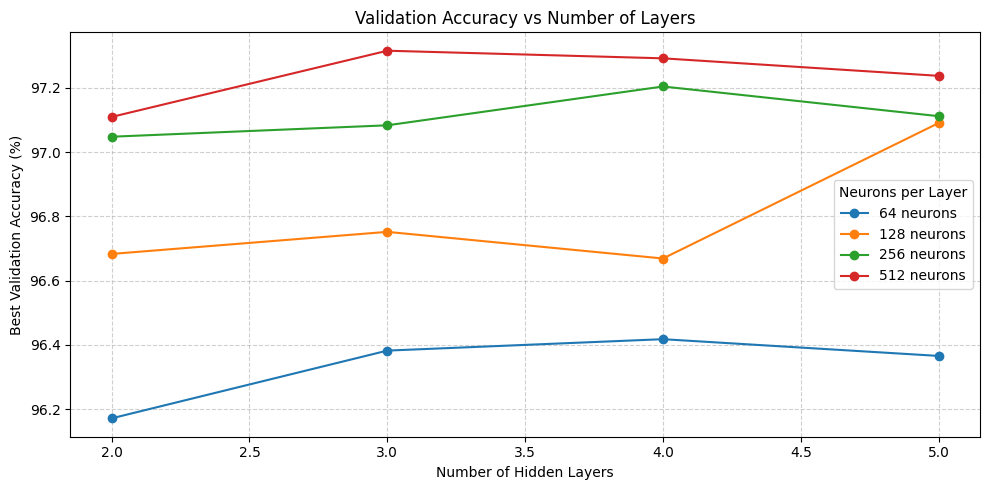

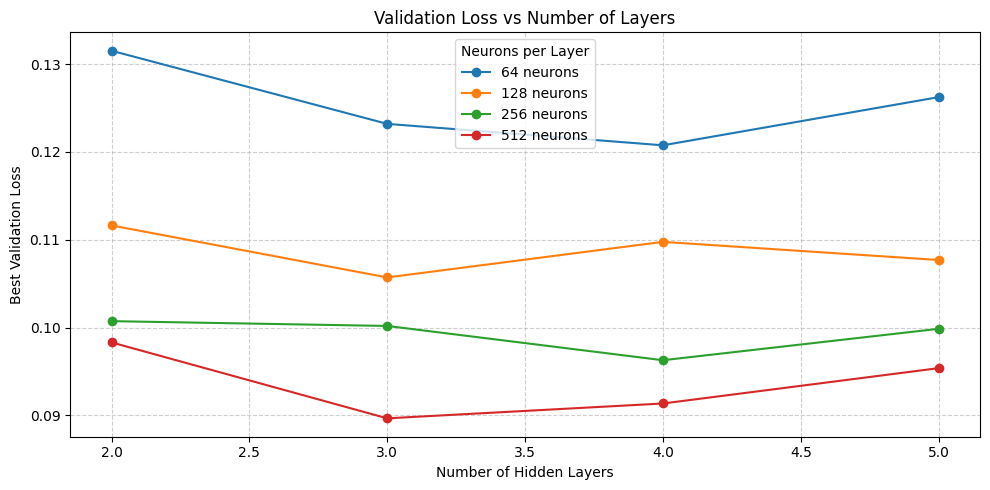

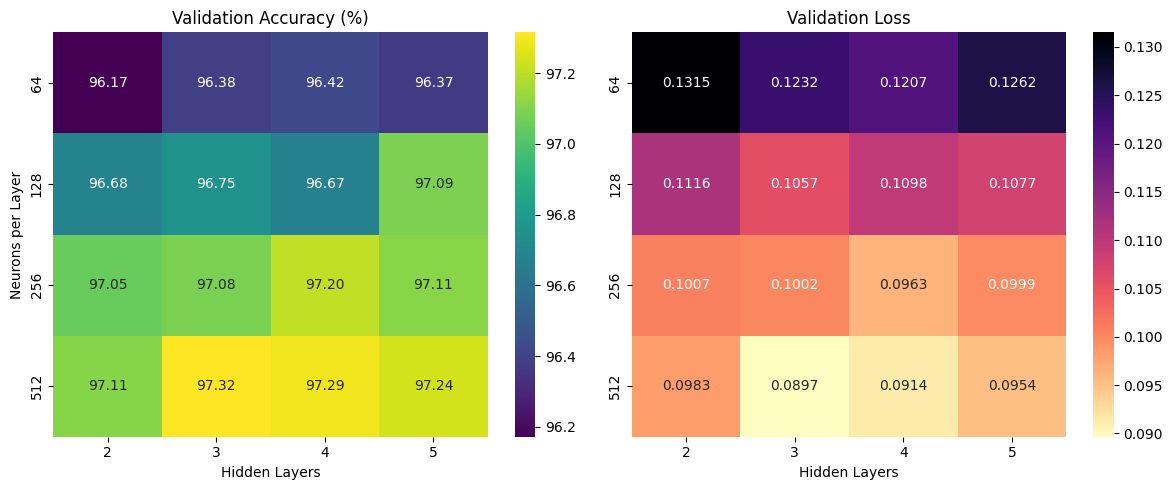

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Check for results ---
if len(arch_results) == 0:
    print("⚠️ No results to plot — make sure training completed successfully.")
else:
    # Extract results
    layers = sorted(set([r[0] for r in arch_results]))
    neurons = sorted(set([r[1] for r in arch_results]))

    # Build matrices for accuracy (%) and loss
    acc_matrix = np.zeros((len(neurons), len(layers)))
    loss_matrix = np.zeros((len(neurons), len(layers)))

    for i, n in enumerate(neurons):
        for j, l in enumerate(layers):
            match = [r for r in arch_results if r[0] == l and r[1] == n]
            if match:
                acc_matrix[i, j] = match[0][2] * 100  # accuracy %
                loss_matrix[i, j] = match[0][3]       # validation loss
            else:
                acc_matrix[i, j] = np.nan
                loss_matrix[i, j] = np.nan

    # 1. Validation Accuracy vs Number of Layers (line plot)
    plt.figure(figsize=(10, 5))
    for n in neurons:
        subset = [(l, acc) for l, u, acc, *_ in arch_results if u == n]
        if subset:
            plt.plot([s[0] for s in subset], [s[1]*100 for s in subset],
                     marker='o', label=f'{n} neurons')

    plt.title("Validation Accuracy vs Number of Layers")
    plt.xlabel("Number of Hidden Layers")
    plt.ylabel("Best Validation Accuracy (%)")
    plt.legend(title="Neurons per Layer")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 2. Validation Loss vs Number of Layers (line plot)
    plt.figure(figsize=(10, 5))
    for n in neurons:
        subset = [(l, loss) for l, u, _, loss, *_ in arch_results if u == n]
        if subset:
            plt.plot([s[0] for s in subset], [s[1] for s in subset],
                     marker='o', label=f'{n} neurons')

    plt.title("Validation Loss vs Number of Layers")
    plt.xlabel("Number of Hidden Layers")
    plt.ylabel("Best Validation Loss")
    plt.legend(title="Neurons per Layer")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 3. Accuracy & Loss Heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(acc_matrix, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=layers, yticklabels=neurons, ax=axes[0])
    axes[0].set_title("Validation Accuracy (%)")
    axes[0].set_xlabel("Hidden Layers")
    axes[0].set_ylabel("Neurons per Layer")

    sns.heatmap(loss_matrix, annot=True, fmt=".4f", cmap="magma_r",
                xticklabels=layers, yticklabels=neurons, ax=axes[1])
    axes[1].set_title("Validation Loss")
    axes[1].set_xlabel("Hidden Layers")

    plt.tight_layout()
    plt.show()




###  **📊** Architecture Experiment Analysis

### Observations
- **Increasing the number of layers** generally **improves accuracy up to 3 or 4 layers**, after which it slightly drops or saturates.
- Models with **more neurons (256–512)** consistently **perform better** because they have higher capacity to capture patterns.
- However, after a point (5 layers), performance decreases slightly — due to **overfitting**.

### Interpretation:
- A moderately deep network (3–4 layers) with 512 neurons per layer yields the best validation accuracy (~97.5%).
Adding more layers beyond that adds complexity without significant benefit.

### Conclusion:
- The best-performing configuration is a **3 layer network with 512 neurons per layer**, which achieves the highest validation accuracy (97.32%) and lowest loss (0.0897).

- Adding **more layers** may cause **overfitting**.
- Networks with too **few neurons** (64–128) **underfit**.



# Bonus

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, dropout_rate=0.0, use_batchnorm=False):
        super(Net, self).__init__()

        def conv_block(in_c, out_c):
            layers = [nn.Conv2d(in_c, out_c, 3, padding=1)]
            if use_batchnorm:
                layers.append(nn.BatchNorm2d(out_c))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(2, 2))
            return nn.Sequential(*layers)

        self.conv_layers = nn.Sequential(
            conv_block(1, 32),
            conv_block(32, 64)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x



=== DROPOUT ONLY ===

Training with Dropout=0.1
Epoch 01: Train Acc=63.79% | Val Acc=83.54%
Epoch 02: Train Acc=89.17% | Val Acc=91.14%
Epoch 03: Train Acc=92.32% | Val Acc=91.64%
Epoch 04: Train Acc=94.10% | Val Acc=95.03%
Epoch 05: Train Acc=95.34% | Val Acc=95.78%
Epoch 06: Train Acc=95.89% | Val Acc=95.24%
Epoch 07: Train Acc=96.47% | Val Acc=96.19%
Epoch 08: Train Acc=96.85% | Val Acc=96.03%
Epoch 09: Train Acc=97.24% | Val Acc=96.95%
Epoch 10: Train Acc=97.40% | Val Acc=97.09%
✅ Done: Dropout=0.1, Best Val Acc=97.09%

Training with Dropout=0.3
Epoch 01: Train Acc=58.09% | Val Acc=82.45%
Epoch 02: Train Acc=87.05% | Val Acc=91.52%
Epoch 03: Train Acc=90.84% | Val Acc=91.09%
Epoch 04: Train Acc=92.60% | Val Acc=94.12%
Epoch 05: Train Acc=93.82% | Val Acc=93.41%
Epoch 06: Train Acc=94.71% | Val Acc=90.01%
Epoch 07: Train Acc=95.37% | Val Acc=96.05%
Epoch 08: Train Acc=95.71% | Val Acc=96.09%
Epoch 09: Train Acc=96.25% | Val Acc=96.81%
Epoch 10: Train Acc=96.55% | Val Acc=97.00%
✅ D

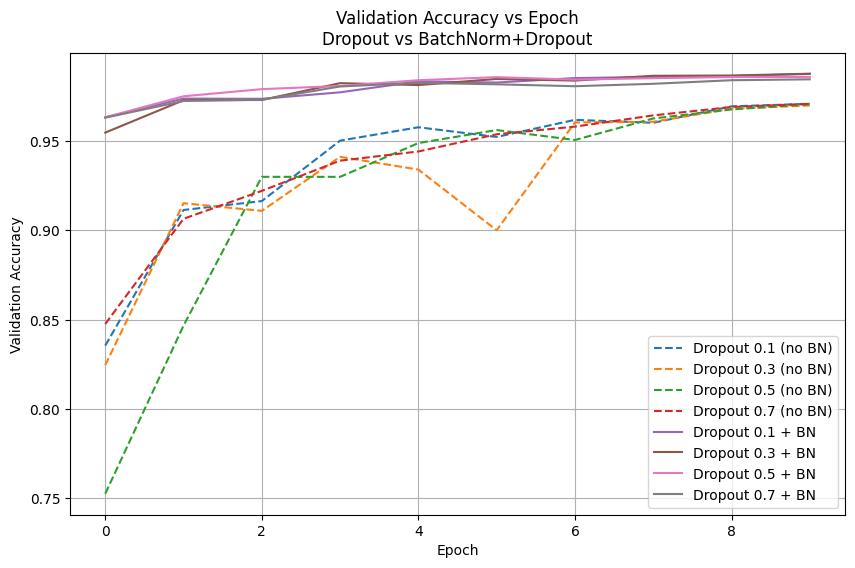

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

dropout_rates = [0.1, 0.3, 0.5, 0.7]
num_epochs = 10
lr = 0.01

# Store results
results = {
    "dropout_only": {},
    "batchnorm_dropout": {}
}

def train_and_validate(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    n_train = len(train_loader.dataset)
    n_val = len(valid_loader.dataset)

    train_acc, val_acc = [], []

    for epoch in range(epochs):
        model.train()
        total_correct = 0
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * images.size(0)
            total_correct += (outputs.argmax(1) == labels).sum().item()
        train_acc.append(total_correct / n_train)

        # Validation
        model.eval()
        val_correct, val_loss = 0, 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.cuda(), labels.cuda()
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()
        val_acc.append(val_correct / n_val)

        print(f"Epoch {epoch+1:02d}: Train Acc={train_acc[-1]*100:.2f}% | Val Acc={val_acc[-1]*100:.2f}%")

    return val_acc


# ====== 1️⃣ Dropout-only runs ======
print("\n=== DROPOUT ONLY ===")
for rate in dropout_rates:
    print(f"\nTraining with Dropout={rate}")
    model = Net(dropout_rate=rate, use_batchnorm=False).cuda()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    val_acc = train_and_validate(model, train_loader, valid_loader, criterion, optimizer, num_epochs)
    results["dropout_only"][rate] = val_acc
    print(f"✅ Done: Dropout={rate}, Best Val Acc={max(val_acc)*100:.2f}%")


# ====== 2️⃣ BatchNorm + Dropout runs ======
print("\n=== BATCHNORM + DROPOUT ===")
for rate in dropout_rates:
    print(f"\nTraining with BatchNorm + Dropout={rate}")
    model = Net(dropout_rate=rate, use_batchnorm=True).cuda()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    val_acc = train_and_validate(model, train_loader, valid_loader, criterion, optimizer, num_epochs)
    results["batchnorm_dropout"][rate] = val_acc
    print(f"✅ Done: BN+Dropout={rate}, Best Val Acc={max(val_acc)*100:.2f}%")


# ====== 📊 Plot Comparison ======
plt.figure(figsize=(10, 6))
for rate, accs in results["dropout_only"].items():
    plt.plot(accs, linestyle="--", label=f"Dropout {rate} (no BN)")
for rate, accs in results["batchnorm_dropout"].items():
    plt.plot(accs, linestyle="-", label=f"Dropout {rate} + BN")
plt.title("Validation Accuracy vs Epoch\nDropout vs BatchNorm+Dropout")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## 1. Dropout Analysis

Dropout was applied at different rates: **0.1, 0.3, 0.5, and 0.7**, without batch normalization.

**General trend:**
- As dropout rate increases, training becomes noisier but overfitting is reduced.

**Observation:**

- Low dropout (0.1–0.3) allows faster convergence but risks mild overfitting.

- Higher dropout (0.5–0.7) slows learning in early epochs but leads to smoother generalization later.

**Validation accuracy:**
- The best validation accuracy across dropout-only models reached around 95–96%, with small differences between rates after 8–10 epochs.

**Interpretation:**
- Dropout acts as a strong regularizer — it prevents the network from relying too heavily on any subset of neurons, encouraging redundant feature learning and better generalization.

## 2. Batch Normalization Effect

Batch normalization (BN) was added alongside the same dropout rates.

**Observation:**

- All BN+Dropout curves (solid lines) start at higher accuracy and reach ~97–98% validation accuracy much faster.

- Training is noticeably more stable — fewer oscillations between epochs.

**Explanation:**
- BN normalizes intermediate activations, reducing internal covariate shift. This allows the model to train with a higher learning rate and converge faster, even with dropout applied.

**Combined effect:**
- BN complements dropout: while dropout adds noise for regularization, BN stabilizes learning dynamics, preventing that noise from causing unstable gradients.

## Conclusions

- Dropout-only models help control overfitting but may converge slowly at high dropout rates.
- BatchNorm + Dropout leads to:

  - Faster convergence (stable early epochs)

  - Higher final accuracy (~98%)

  - Improved generalization across dropout rates
